# Income Census Adult 

In [1]:
# importing required librariews 

In [2]:
!pip install sklearn

In [3]:
conda install -c anaconda py-xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.under_sampling import OneSidedSelection
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize']=(16, 8.27) #set graphs size to A4 dimensions
sns.set_style('darkgrid')
sns.set(font_scale = 1.4)

In [5]:
train_data = pd.read_csv("census_income_learn.csv", header= None)

In [6]:
test_data = train_data = pd.read_csv("census_income_test.csv", header= None)

In [7]:
import csv 

f = open('Header.csv','r')
reader = csv.reader(f)
header_list = []

for row in reader:
    header_list.append(row)
    
flat_list = [num for sublist in header_list for num in sublist]


In [8]:
flat_list

['Age',
 'Class Of Worker',
 'Detailed Industry Recode',
 'Detailed Occupation Recode',
 'Education',
 'Wage Per Hour',
 'Enroll In Edu Inst Last Wk',
 'Marital Stat',
 'Major Industry Code',
 'Major Occupation Code',
 'Race',
 'Hispanic Origin',
 'Sex',
 'Member Of A Labor Union',
 'Reason For Unemployment',
 'Full Or Part Time Employment Stat',
 'Capital Gains',
 'Capital Losses',
 'Dividends From Stocks',
 'Tax Filer Stat',
 'Region Of Previous Residence',
 'State Of Previous Residence',
 'Detailed Household And Family Stat',
 'Detailed Household Summary In Household',
 'Instance Weight',
 'Migration Code-Change In Msa',
 'Migration Code-Change In Reg',
 'Migration Code-Move Within Reg',
 'Live In This House 1 Year Ago',
 'Migration Prev Res In Sunbelt',
 'Num Persons Worked For Employer',
 'Family Members Under 18',
 'Country Of Birth Father',
 'Country Of Birth Mother',
 'Country Of Birth Self',
 'Citizenship',
 'Own Business Or Self Employed',
 "Fill Inc Questionnaire For Veteran

In [9]:
train_data.columns = flat_list

In [10]:
train_data.head()

,Age,Class Of Worker,Detailed Industry Recode,Detailed Occupation Recode,Education,Wage Per Hour,Enroll In Edu Inst Last Wk,Marital Stat,Major Industry Code,Major Occupation Code,Race,Hispanic Origin,Sex,Member Of A Labor Union,Reason For Unemployment,Full Or Part Time Employment Stat,Capital Gains,Capital Losses,Dividends From Stocks,Tax Filer Stat,Region Of Previous Residence,State Of Previous Residence,Detailed Household And Family Stat,Detailed Household Summary In Household,Instance Weight,Migration Code-Change In Msa,Migration Code-Change In Reg,Migration Code-Move Within Reg,Live In This House 1 Year Ago,Migration Prev Res In Sunbelt,Num Persons Worked For Employer,Family Members Under 18,Country Of Birth Father,Country Of Birth Mother,Country Of Birth Self,Citizenship,Own Business Or Self Employed,Fill Inc Questionnaire For Veteran'S Admin,Veterans Benefits,Weeks Worked In Year,Year,Income
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,Not in universe,Not in universe,Full-time schedules,0,0,0,Joint one under 65 & one 65+,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1032.38,?,?,?,Not in universe under 1 year old,?,4,Not in universe,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,Not in universe,Not in universe,PT for econ reasons usually PT,0,0,2500,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1462.33,?,?,?,Not in universe under 1 year old,?,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1601.75,?,?,?,Not in universe under 1 year old,?,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,Not in universe,Not in universe,Householder,Householder,1866.88,Nonmover,Nonmover,Nonmover,Yes,Not in universe,5,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,1394.54,?,?,?,Not in universe under 1 year old,?,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.


In [11]:
train_data.to_csv('train_data.csv',index=False)

In [12]:
test_data.columns = flat_list

In [13]:
test_data.head()

,Age,Class Of Worker,Detailed Industry Recode,Detailed Occupation Recode,Education,Wage Per Hour,Enroll In Edu Inst Last Wk,Marital Stat,Major Industry Code,Major Occupation Code,Race,Hispanic Origin,Sex,Member Of A Labor Union,Reason For Unemployment,Full Or Part Time Employment Stat,Capital Gains,Capital Losses,Dividends From Stocks,Tax Filer Stat,Region Of Previous Residence,State Of Previous Residence,Detailed Household And Family Stat,Detailed Household Summary In Household,Instance Weight,Migration Code-Change In Msa,Migration Code-Change In Reg,Migration Code-Move Within Reg,Live In This House 1 Year Ago,Migration Prev Res In Sunbelt,Num Persons Worked For Employer,Family Members Under 18,Country Of Birth Father,Country Of Birth Mother,Country Of Birth Self,Citizenship,Own Business Or Self Employed,Fill Inc Questionnaire For Veteran'S Admin,Veterans Benefits,Weeks Worked In Year,Year,Income
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,Not in universe,Not in universe,Full-time schedules,0,0,0,Joint one under 65 & one 65+,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1032.38,?,?,?,Not in universe under 1 year old,?,4,Not in universe,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,Not in universe,Not in universe,PT for econ reasons usually PT,0,0,2500,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1462.33,?,?,?,Not in universe under 1 year old,?,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1601.75,?,?,?,Not in universe under 1 year old,?,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,Not in universe,Not in universe,Householder,Householder,1866.88,Nonmover,Nonmover,Nonmover,Yes,Not in universe,5,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,1394.54,?,?,?,Not in universe under 1 year old,?,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.


## 1) Exploratory Data Analysis

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99762 entries, 0 to 99761
Data columns (total 42 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Age                                         99762 non-null  int64  
 1   Class Of Worker                             99762 non-null  object 
 2   Detailed Industry Recode                    99762 non-null  int64  
 3   Detailed Occupation Recode                  99762 non-null  int64  
 4   Education                                   99762 non-null  object 
 5   Wage Per Hour                               99762 non-null  int64  
 6   Enroll In Edu Inst Last Wk                  99762 non-null  object 
 7   Marital Stat                                99762 non-null  object 
 8   Major Industry Code                         99762 non-null  object 
 9   Major Occupation Code                       99762 non-null  object 
 10  Race      

In [15]:
train_data.describe()

,Age,Detailed Industry Recode,Detailed Occupation Recode,Wage Per Hour,Capital Gains,Capital Losses,Dividends From Stocks,Instance Weight,Num Persons Worked For Employer,Own Business Or Self Employed,Veterans Benefits,Weeks Worked In Year,Year
count,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000,99762.000000
mean,34.628596,15.332812,11.331118,54.461268,425.788577,35.919458,192.494727,1739.542838,1.956156,0.178505,1.519827,23.185331,94.500652
std,22.333449,18.026709,14.459589,270.202643,4616.795578,265.525252,1841.728492,994.900902,2.364331,0.558316,0.848229,24.389184,0.500002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.260000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1058.050000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1615.395000,1.000000,0.000000,2.000000,8.000000,95.000000
75%,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2187.277500,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9900.000000,99999.000000,4608.000000,99999.000000,16258.200000,6.000000,2.000000,2.000000,52.000000,95.000000


In [16]:
# find numerical and catagorical features in the dataset

In [17]:
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']
categorical_features = [feature for feature in train_data.columns if train_data[feature].dtypes == 'O' and feature != 'Income']


In [18]:
numerical_features

['Age',
 'Detailed Industry Recode',
 'Detailed Occupation Recode',
 'Wage Per Hour',
 'Capital Gains',
 'Capital Losses',
 'Dividends From Stocks',
 'Instance Weight',
 'Num Persons Worked For Employer',
 'Own Business Or Self Employed',
 'Veterans Benefits',
 'Weeks Worked In Year',
 'Year']

In [19]:
categorical_features

['Class Of Worker',
 'Education',
 'Enroll In Edu Inst Last Wk',
 'Marital Stat',
 'Major Industry Code',
 'Major Occupation Code',
 'Race',
 'Hispanic Origin',
 'Sex',
 'Member Of A Labor Union',
 'Reason For Unemployment',
 'Full Or Part Time Employment Stat',
 'Tax Filer Stat',
 'Region Of Previous Residence',
 'State Of Previous Residence',
 'Detailed Household And Family Stat',
 'Detailed Household Summary In Household',
 'Migration Code-Change In Msa',
 'Migration Code-Change In Reg',
 'Migration Code-Move Within Reg',
 'Live In This House 1 Year Ago',
 'Migration Prev Res In Sunbelt',
 'Family Members Under 18',
 'Country Of Birth Father',
 'Country Of Birth Mother',
 'Country Of Birth Self',
 'Citizenship',
 "Fill Inc Questionnaire For Veteran'S Admin"]

In [20]:
# find missing value 

In [21]:
train_data.isnull().sum()

Age                                           0
Class Of Worker                               0
Detailed Industry Recode                      0
Detailed Occupation Recode                    0
Education                                     0
Wage Per Hour                                 0
Enroll In Edu Inst Last Wk                    0
Marital Stat                                  0
Major Industry Code                           0
Major Occupation Code                         0
Race                                          0
Hispanic Origin                               0
Sex                                           0
Member Of A Labor Union                       0
Reason For Unemployment                       0
Full Or Part Time Employment Stat             0
Capital Gains                                 0
Capital Losses                                0
Dividends From Stocks                         0
Tax Filer Stat                                0
Region Of Previous Residence            

In [22]:
train_data = train_data.replace(' ?', np.NaN)

In [23]:
train_data.isna().sum()

Age                                               0
Class Of Worker                                   0
Detailed Industry Recode                          0
Detailed Occupation Recode                        0
Education                                         0
Wage Per Hour                                     0
Enroll In Edu Inst Last Wk                        0
Marital Stat                                      0
Major Industry Code                               0
Major Occupation Code                             0
Race                                              0
Hispanic Origin                                   0
Sex                                               0
Member Of A Labor Union                           0
Reason For Unemployment                           0
Full Or Part Time Employment Stat                 0
Capital Gains                                     0
Capital Losses                                    0
Dividends From Stocks                             0
Tax Filer St

In [24]:
train_data["State Of Previous Residence"] = train_data["State Of Previous Residence"].fillna(train_data["State Of Previous Residence"].mode()[0])
train_data["Country Of Birth Father"] = train_data["Country Of Birth Father"].fillna(train_data["Country Of Birth Father"].mode()[0])
train_data["Country Of Birth Mother"] = train_data["Country Of Birth Mother"].fillna(train_data["Country Of Birth Mother"].mode()[0])
train_data["Country Of Birth Self"] = train_data["Country Of Birth Self"].fillna(train_data["Country Of Birth Self"].mode()[0])

In [25]:
train_data.isna().sum()

Age                                               0
Class Of Worker                                   0
Detailed Industry Recode                          0
Detailed Occupation Recode                        0
Education                                         0
Wage Per Hour                                     0
Enroll In Edu Inst Last Wk                        0
Marital Stat                                      0
Major Industry Code                               0
Major Occupation Code                             0
Race                                              0
Hispanic Origin                                   0
Sex                                               0
Member Of A Labor Union                           0
Reason For Unemployment                           0
Full Or Part Time Employment Stat                 0
Capital Gains                                     0
Capital Losses                                    0
Dividends From Stocks                             0
Tax Filer St

In [26]:
train_data.dropna(inplace=True)

In [27]:
train_data.isna().sum()

Age                                           0
Class Of Worker                               0
Detailed Industry Recode                      0
Detailed Occupation Recode                    0
Education                                     0
Wage Per Hour                                 0
Enroll In Edu Inst Last Wk                    0
Marital Stat                                  0
Major Industry Code                           0
Major Occupation Code                         0
Race                                          0
Hispanic Origin                               0
Sex                                           0
Member Of A Labor Union                       0
Reason For Unemployment                       0
Full Or Part Time Employment Stat             0
Capital Gains                                 0
Capital Losses                                0
Dividends From Stocks                         0
Tax Filer Stat                                0
Region Of Previous Residence            

In [28]:
# ditinct values for each numerical feature

In [29]:
for feature in numerical_features:
    print(feature, ':', train_data[feature].nunique())

Age : 91
Detailed Industry Recode : 51
Detailed Occupation Recode : 47
Wage Per Hour : 596
Capital Gains : 121
Capital Losses : 106
Dividends From Stocks : 717
Instance Weight : 34096
Num Persons Worked For Employer : 7
Own Business Or Self Employed : 3
Veterans Benefits : 3
Weeks Worked In Year : 53
Year : 1


In [30]:
# distinct values of each categorical feature

In [31]:
for feature in categorical_features:
    print(feature,  ':' , train_data[feature].nunique())

Class Of Worker : 9
Education : 17
Enroll In Edu Inst Last Wk : 3
Marital Stat : 7
Major Industry Code : 24
Major Occupation Code : 15
Race : 5
Hispanic Origin : 10
Sex : 2
Member Of A Labor Union : 3
Reason For Unemployment : 6
Full Or Part Time Employment Stat : 1
Tax Filer Stat : 6
Region Of Previous Residence : 6
State Of Previous Residence : 50
Detailed Household And Family Stat : 36
Detailed Household Summary In Household : 8
Migration Code-Change In Msa : 9
Migration Code-Change In Reg : 8
Migration Code-Move Within Reg : 9
Live In This House 1 Year Ago : 3
Migration Prev Res In Sunbelt : 3
Family Members Under 18 : 5
Country Of Birth Father : 40
Country Of Birth Mother : 40
Country Of Birth Self : 41
Citizenship : 5
Fill Inc Questionnaire For Veteran'S Admin : 3


In [32]:
# for each catagorical value we calculate relative frequency of unique classes.

for feature in categorical_features:
    freq = train_data[feature].value_counts(normalize=True).rename_axis(feature).reset_index(name='relative frequency')
    print('\n')
    print(freq)



                   Class Of Worker  relative frequency
0                  Not in universe            0.505300
1                          Private            0.358178
2   Self-employed-not incorporated            0.043841
3                 Local government            0.038823
4                 State government            0.020636
5       Self-employed-incorporated            0.016099
6               Federal government            0.014453
7                     Never worked            0.001907
8                      Without pay            0.000763


                                  Education  relative frequency
0                      High school graduate            0.243777
1                                  Children            0.235968
2                Some college but no degree            0.140236
3                Bachelors degree(BA AB BS)            0.096154
4                         7th and 8th grade            0.042858
5                                10th grade            0.03842

In [33]:
# check class imbalance

In [34]:
train_data['Income'].value_counts(normalize=True)

 - 50000.    0.942609
 50000+.     0.057391
Name: Income, dtype: float64

In [35]:
# Now let's do some graphs for train set in order to find key relationships !!!

C:\Users\Harsh07\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


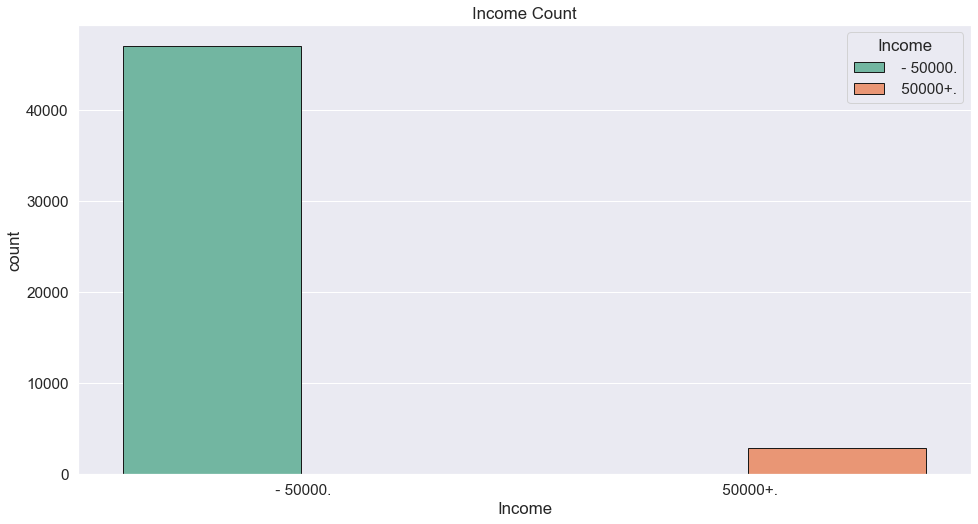

In [36]:
ax=sns.countplot(train_data['Income'],hue=train_data['Income'],edgecolor='k',palette='Set2')
ax.set_title('Income Count')
ax.set_xlabel('Income')
plt.show()

C:\Users\Harsh07\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


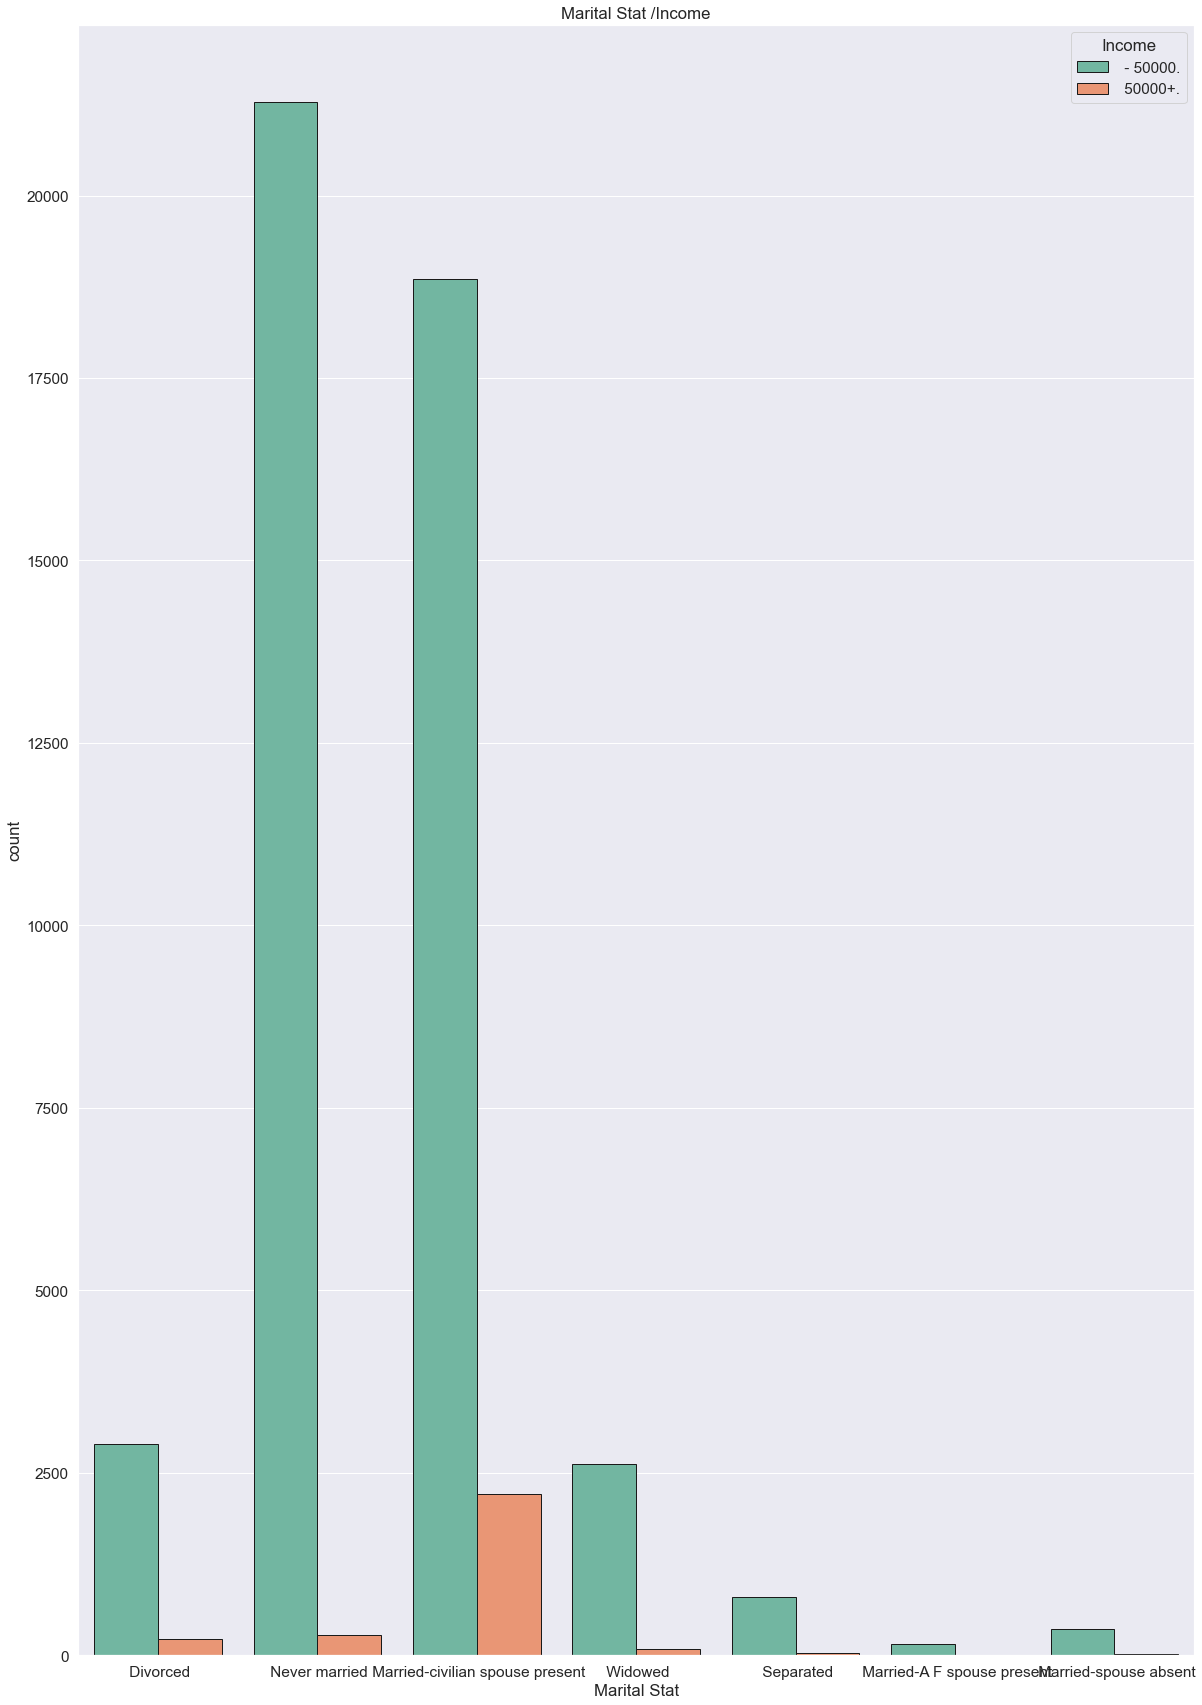

In [37]:
fig_dims = (20, 30)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.countplot(train_data['Marital Stat'], hue=train_data['Income'],edgecolor='k',palette='Set2')
ax.set_title('Marital Stat /Income')
ax.set_xlabel('Marital Stat')
plt.show()

C:\Users\Harsh07\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


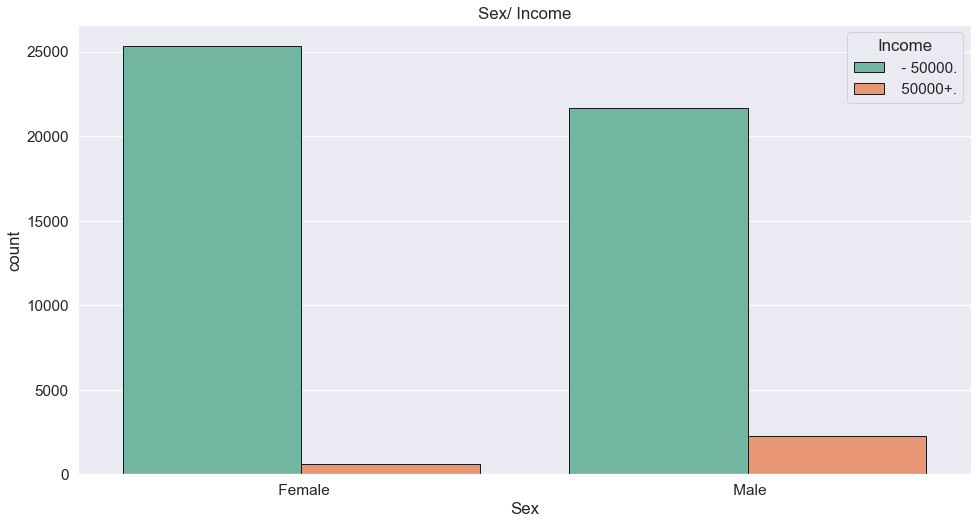

In [38]:
ax = sns.countplot(train_data['Sex'],hue = train_data['Income'],edgecolor='k',palette='Set2') 
ax.set_title('Sex/ Income')
ax.set_xlabel('Sex')
plt.show()

C:\Users\Harsh07\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


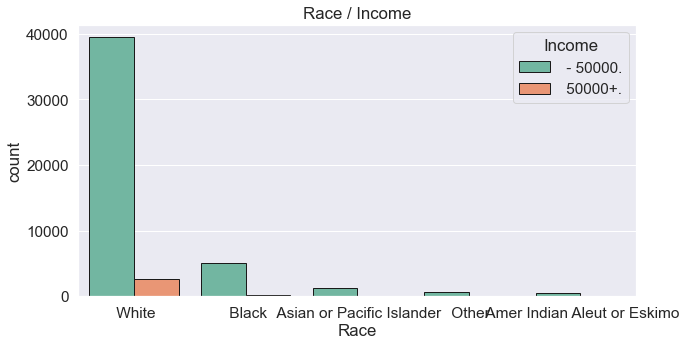

In [39]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.countplot(train_data['Race'], hue=train_data['Income'],edgecolor='k',palette='Set2')
ax.set_title('Race / Income')
ax.set_xlabel('Race')
plt.show()

C:\Users\Harsh07\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


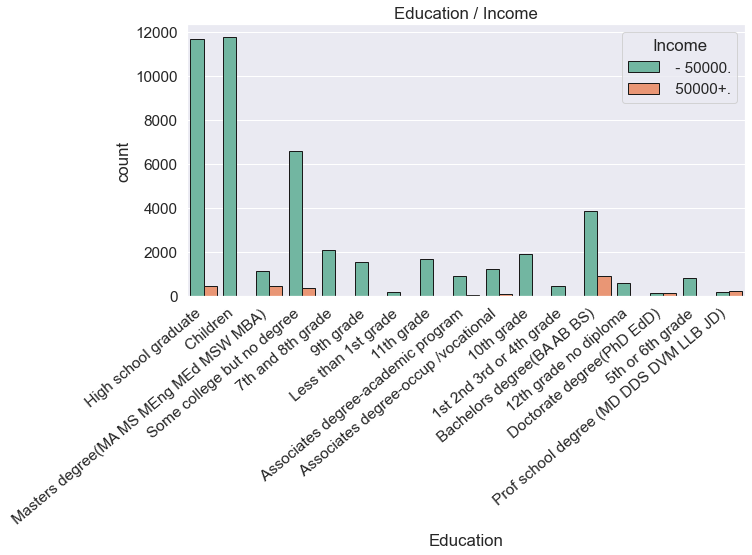

In [40]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.countplot(train_data['Education'], hue=train_data['Income'],edgecolor='k',palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Education / Income')
ax.set_xlabel('Education')
plt.show()

C:\Users\Harsh07\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


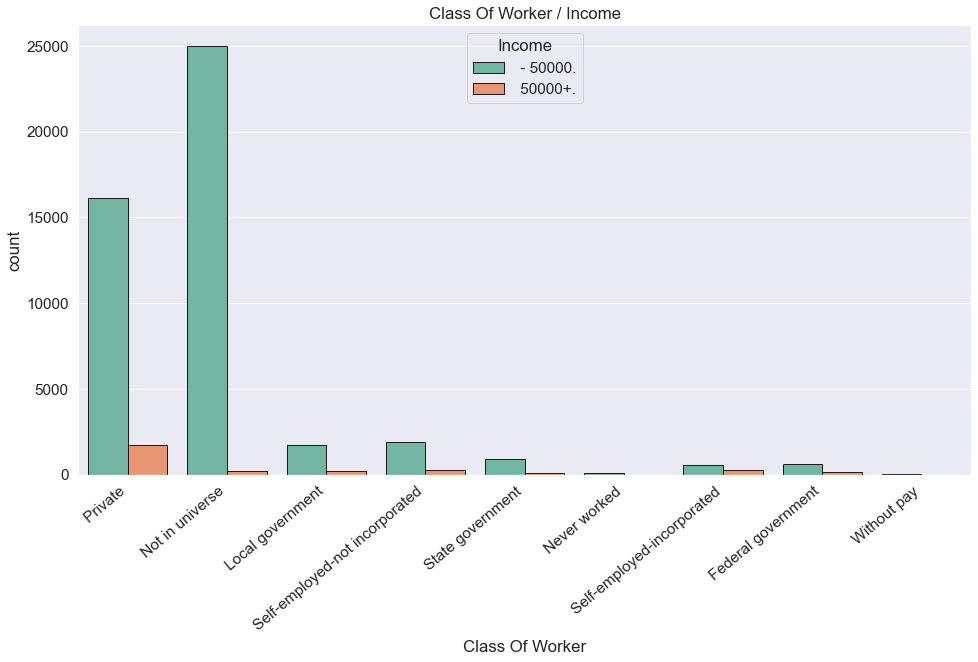

In [41]:
ax=sns.countplot(train_data['Class Of Worker'], hue=train_data['Income'],edgecolor='k',palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Class Of Worker / Income')
ax.set_xlabel('Class Of Worker')
plt.show()

C:\Users\Harsh07\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


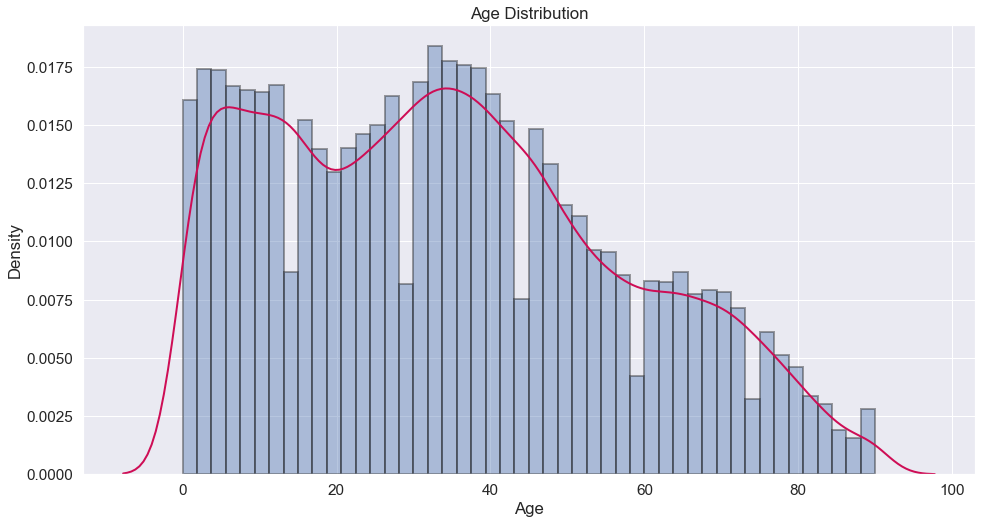

In [42]:
ax=sns.distplot(train_data['Age'],hist_kws=dict(edgecolor="k", linewidth=2),kde_kws={"color": "#ce0d55", "lw": 2})
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
plt.show()

C:\Users\Harsh07\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


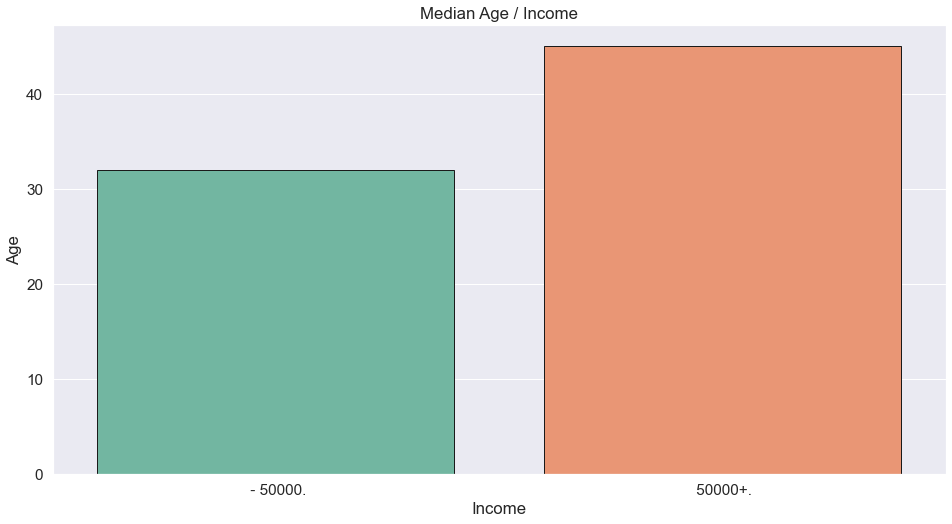

In [43]:
#median age for each wage_class
ax=sns.barplot(train_data.groupby('Income')['Age'].median().index,train_data.groupby('Income')['Age'].median().values,
               edgecolor='k', palette='Set2')
ax.set_ylabel('Age')
ax.set_xlabel('Income')
ax.set_title('Median Age / Income')
plt.show()

C:\Users\Harsh07\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


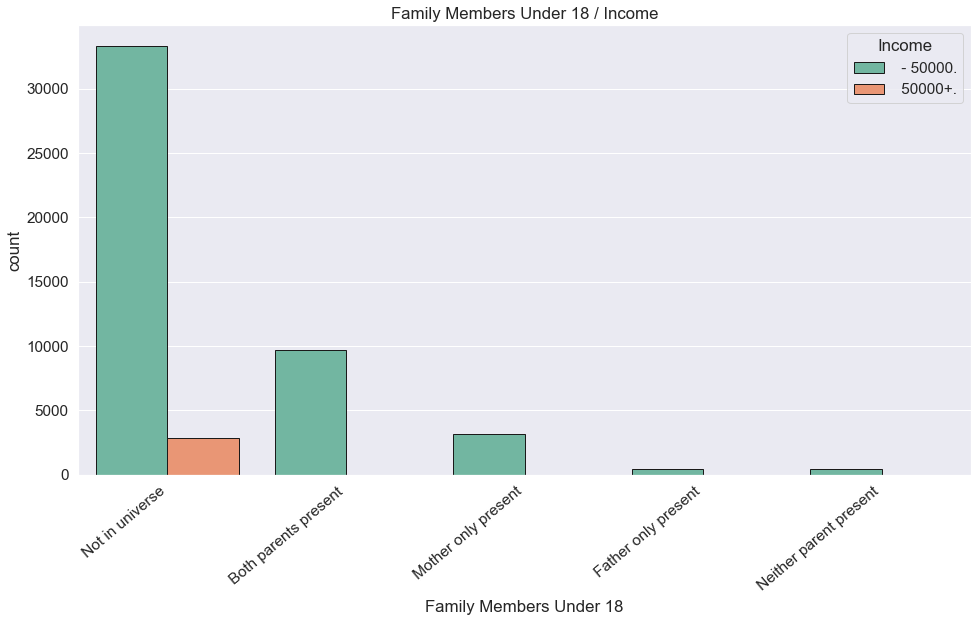

In [44]:
ax=sns.countplot(train_data['Family Members Under 18'], hue=train_data['Income'],edgecolor='k',palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Family Members Under 18 / Income')
ax.set_xlabel('Family Members Under 18')
plt.show()

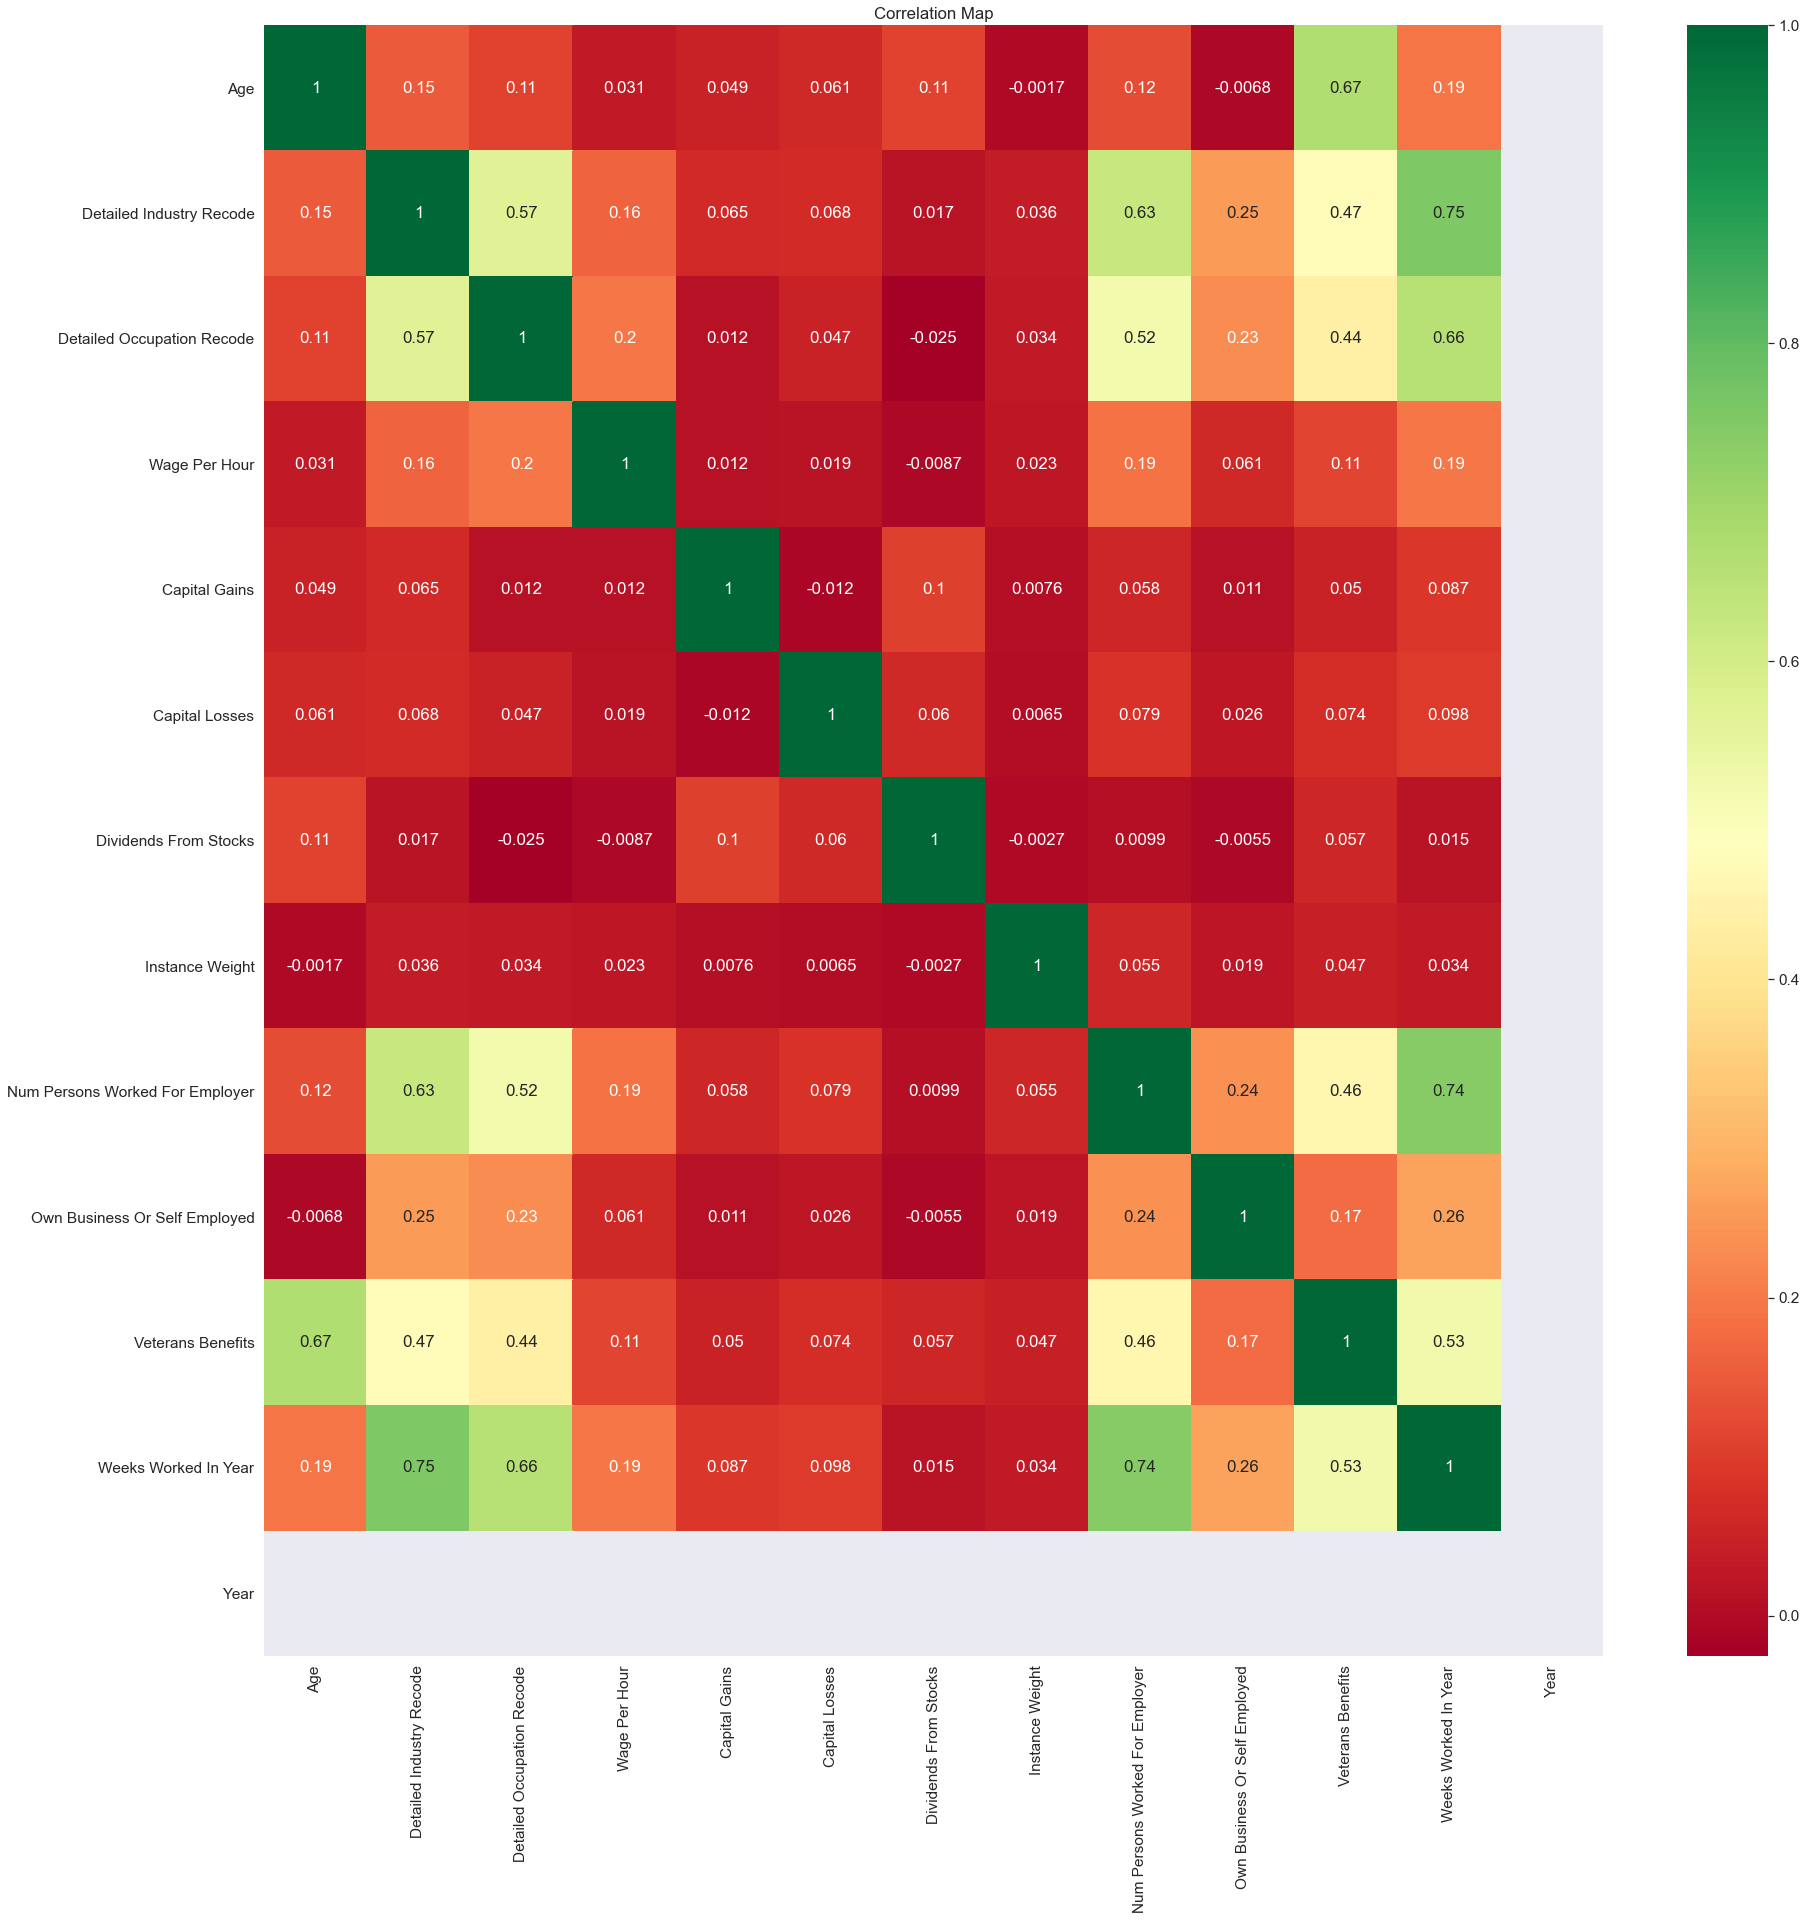

In [45]:
corr_train = train_data.copy()
for feature in categorical_features:
    corr_train.drop(feature, axis=1, inplace=True)
    
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.heatmap(corr_train.corr(), cmap='RdYlGn',annot=True)
ax.set_title('Correlation Map')
plt.show()


In [46]:
#test dataset

In [47]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99762 entries, 0 to 99761
Data columns (total 42 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Age                                         99762 non-null  int64  
 1   Class Of Worker                             99762 non-null  object 
 2   Detailed Industry Recode                    99762 non-null  int64  
 3   Detailed Occupation Recode                  99762 non-null  int64  
 4   Education                                   99762 non-null  object 
 5   Wage Per Hour                               99762 non-null  int64  
 6   Enroll In Edu Inst Last Wk                  99762 non-null  object 
 7   Marital Stat                                99762 non-null  object 
 8   Major Industry Code                         99762 non-null  object 
 9   Major Occupation Code                       99762 non-null  object 
 10  Race      

In [48]:
test_data.head()

,Age,Class Of Worker,Detailed Industry Recode,Detailed Occupation Recode,Education,Wage Per Hour,Enroll In Edu Inst Last Wk,Marital Stat,Major Industry Code,Major Occupation Code,Race,Hispanic Origin,Sex,Member Of A Labor Union,Reason For Unemployment,Full Or Part Time Employment Stat,Capital Gains,Capital Losses,Dividends From Stocks,Tax Filer Stat,Region Of Previous Residence,State Of Previous Residence,Detailed Household And Family Stat,Detailed Household Summary In Household,Instance Weight,Migration Code-Change In Msa,Migration Code-Change In Reg,Migration Code-Move Within Reg,Live In This House 1 Year Ago,Migration Prev Res In Sunbelt,Num Persons Worked For Employer,Family Members Under 18,Country Of Birth Father,Country Of Birth Mother,Country Of Birth Self,Citizenship,Own Business Or Self Employed,Fill Inc Questionnaire For Veteran'S Admin,Veterans Benefits,Weeks Worked In Year,Year,Income
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,Not in universe,Not in universe,Full-time schedules,0,0,0,Joint one under 65 & one 65+,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1032.38,?,?,?,Not in universe under 1 year old,?,4,Not in universe,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,Not in universe,Not in universe,PT for econ reasons usually PT,0,0,2500,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1462.33,?,?,?,Not in universe under 1 year old,?,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1601.75,?,?,?,Not in universe under 1 year old,?,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,Not in universe,Not in universe,Householder,Householder,1866.88,Nonmover,Nonmover,Nonmover,Yes,Not in universe,5,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,1394.54,?,?,?,Not in universe under 1 year old,?,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.


In [49]:
test_data = test_data.replace(' ?', np.NaN)

In [50]:
test_data.isna().sum()

Age                                               0
Class Of Worker                                   0
Detailed Industry Recode                          0
Detailed Occupation Recode                        0
Education                                         0
Wage Per Hour                                     0
Enroll In Edu Inst Last Wk                        0
Marital Stat                                      0
Major Industry Code                               0
Major Occupation Code                             0
Race                                              0
Hispanic Origin                                   0
Sex                                               0
Member Of A Labor Union                           0
Reason For Unemployment                           0
Full Or Part Time Employment Stat                 0
Capital Gains                                     0
Capital Losses                                    0
Dividends From Stocks                             0
Tax Filer St

In [51]:
test_data["State Of Previous Residence"] = test_data["State Of Previous Residence"].fillna(test_data["State Of Previous Residence"].mode()[0])
test_data["Country Of Birth Father"] = test_data["Country Of Birth Father"].fillna(test_data["Country Of Birth Father"].mode()[0])
test_data["Country Of Birth Mother"] = test_data["Country Of Birth Mother"].fillna(test_data["Country Of Birth Mother"].mode()[0])
test_data["Country Of Birth Self"] = test_data["Country Of Birth Self"].fillna(test_data["Country Of Birth Self"].mode()[0])

In [52]:
test_data.isna().sum()

Age                                               0
Class Of Worker                                   0
Detailed Industry Recode                          0
Detailed Occupation Recode                        0
Education                                         0
Wage Per Hour                                     0
Enroll In Edu Inst Last Wk                        0
Marital Stat                                      0
Major Industry Code                               0
Major Occupation Code                             0
Race                                              0
Hispanic Origin                                   0
Sex                                               0
Member Of A Labor Union                           0
Reason For Unemployment                           0
Full Or Part Time Employment Stat                 0
Capital Gains                                     0
Capital Losses                                    0
Dividends From Stocks                             0
Tax Filer St

In [53]:
test_data.dropna(inplace=True)

In [54]:
test_data.isna().sum()

Age                                           0
Class Of Worker                               0
Detailed Industry Recode                      0
Detailed Occupation Recode                    0
Education                                     0
Wage Per Hour                                 0
Enroll In Edu Inst Last Wk                    0
Marital Stat                                  0
Major Industry Code                           0
Major Occupation Code                         0
Race                                          0
Hispanic Origin                               0
Sex                                           0
Member Of A Labor Union                       0
Reason For Unemployment                       0
Full Or Part Time Employment Stat             0
Capital Gains                                 0
Capital Losses                                0
Dividends From Stocks                         0
Tax Filer Stat                                0
Region Of Previous Residence            

In [55]:
test_data.describe()

,Age,Detailed Industry Recode,Detailed Occupation Recode,Wage Per Hour,Capital Gains,Capital Losses,Dividends From Stocks,Instance Weight,Num Persons Worked For Employer,Own Business Or Self Employed,Veterans Benefits,Weeks Worked In Year,Year
count,49816.000000,49816.000000,49816.000000,49816.000000,49816.000000,49816.000000,49816.000000,49816.000000,49816.000000,49816.000000,49816.000000,49816.000000,49816.0
mean,34.637145,15.257166,11.312209,53.869480,399.292617,36.293520,179.367272,1728.578188,1.905532,0.172535,1.518006,22.977658,94.0
std,22.405205,18.016184,14.464212,269.621684,4387.642745,267.968903,1688.512094,972.771937,2.328443,0.550529,0.849392,24.361911,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101.770000,0.000000,0.000000,0.000000,0.000000,94.0
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1065.025000,0.000000,0.000000,2.000000,0.000000,94.0
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1625.045000,1.000000,0.000000,2.000000,8.000000,94.0
75%,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2156.680000,4.000000,0.000000,2.000000,52.000000,94.0
max,90.000000,51.000000,46.000000,9900.000000,99999.000000,4608.000000,99999.000000,16258.200000,6.000000,2.000000,2.000000,52.000000,94.0


In [56]:
#find out numerical and categorical features for test set

In [57]:
numerical_feature_test=[feature for feature in test_data.columns if test_data[feature].dtype!='O']

categorical_feature_test=[feature for feature in test_data.columns if  test_data[feature].dtype=='O' and feature!='Income']

In [58]:
numerical_feature_test

['Age',
 'Detailed Industry Recode',
 'Detailed Occupation Recode',
 'Wage Per Hour',
 'Capital Gains',
 'Capital Losses',
 'Dividends From Stocks',
 'Instance Weight',
 'Num Persons Worked For Employer',
 'Own Business Or Self Employed',
 'Veterans Benefits',
 'Weeks Worked In Year',
 'Year']

In [59]:
categorical_feature_test

['Class Of Worker',
 'Education',
 'Enroll In Edu Inst Last Wk',
 'Marital Stat',
 'Major Industry Code',
 'Major Occupation Code',
 'Race',
 'Hispanic Origin',
 'Sex',
 'Member Of A Labor Union',
 'Reason For Unemployment',
 'Full Or Part Time Employment Stat',
 'Tax Filer Stat',
 'Region Of Previous Residence',
 'State Of Previous Residence',
 'Detailed Household And Family Stat',
 'Detailed Household Summary In Household',
 'Migration Code-Change In Msa',
 'Migration Code-Change In Reg',
 'Migration Code-Move Within Reg',
 'Live In This House 1 Year Ago',
 'Migration Prev Res In Sunbelt',
 'Family Members Under 18',
 'Country Of Birth Father',
 'Country Of Birth Mother',
 'Country Of Birth Self',
 'Citizenship',
 "Fill Inc Questionnaire For Veteran'S Admin"]

In [60]:
test_data.isnull().sum()

Age                                           0
Class Of Worker                               0
Detailed Industry Recode                      0
Detailed Occupation Recode                    0
Education                                     0
Wage Per Hour                                 0
Enroll In Edu Inst Last Wk                    0
Marital Stat                                  0
Major Industry Code                           0
Major Occupation Code                         0
Race                                          0
Hispanic Origin                               0
Sex                                           0
Member Of A Labor Union                       0
Reason For Unemployment                       0
Full Or Part Time Employment Stat             0
Capital Gains                                 0
Capital Losses                                0
Dividends From Stocks                         0
Tax Filer Stat                                0
Region Of Previous Residence            

In [61]:
for feature in numerical_feature_test:
    print(feature, ':', test_data[feature].nunique())

Age : 91
Detailed Industry Recode : 51
Detailed Occupation Recode : 47
Wage Per Hour : 596
Capital Gains : 121
Capital Losses : 106
Dividends From Stocks : 717
Instance Weight : 34096
Num Persons Worked For Employer : 7
Own Business Or Self Employed : 3
Veterans Benefits : 3
Weeks Worked In Year : 53
Year : 1


In [62]:
for feature in categorical_feature_test:
    print(feature, ':', test_data[feature].nunique())

Class Of Worker : 9
Education : 17
Enroll In Edu Inst Last Wk : 3
Marital Stat : 7
Major Industry Code : 24
Major Occupation Code : 15
Race : 5
Hispanic Origin : 10
Sex : 2
Member Of A Labor Union : 3
Reason For Unemployment : 6
Full Or Part Time Employment Stat : 1
Tax Filer Stat : 6
Region Of Previous Residence : 6
State Of Previous Residence : 50
Detailed Household And Family Stat : 36
Detailed Household Summary In Household : 8
Migration Code-Change In Msa : 9
Migration Code-Change In Reg : 8
Migration Code-Move Within Reg : 9
Live In This House 1 Year Ago : 3
Migration Prev Res In Sunbelt : 3
Family Members Under 18 : 5
Country Of Birth Father : 40
Country Of Birth Mother : 40
Country Of Birth Self : 41
Citizenship : 5
Fill Inc Questionnaire For Veteran'S Admin : 3


In [63]:
#for each categorical value we calculate relative frequency of unique classes.
for feature in categorical_feature_test:
    freq_test=test_data[feature].value_counts('f').rename_axis(feature).reset_index(name='relative frequency')
    print('\n')
    print(freq_test)



                   Class Of Worker  relative frequency
0                  Not in universe            0.505300
1                          Private            0.358178
2   Self-employed-not incorporated            0.043841
3                 Local government            0.038823
4                 State government            0.020636
5       Self-employed-incorporated            0.016099
6               Federal government            0.014453
7                     Never worked            0.001907
8                      Without pay            0.000763


                                  Education  relative frequency
0                      High school graduate            0.243777
1                                  Children            0.235968
2                Some college but no degree            0.140236
3                Bachelors degree(BA AB BS)            0.096154
4                         7th and 8th grade            0.042858
5                                10th grade            0.03842

In [64]:
#Check for imbalanced target (In our case approx 76% are in class <=50K and  approx 24% >50K)
test_data['Income'].value_counts(normalize=True) 

 - 50000.    0.942609
 50000+.     0.057391
Name: Income, dtype: float64

In [65]:
# Now let's do some graphs for test in order to find key relationships

C:\Users\Harsh07\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


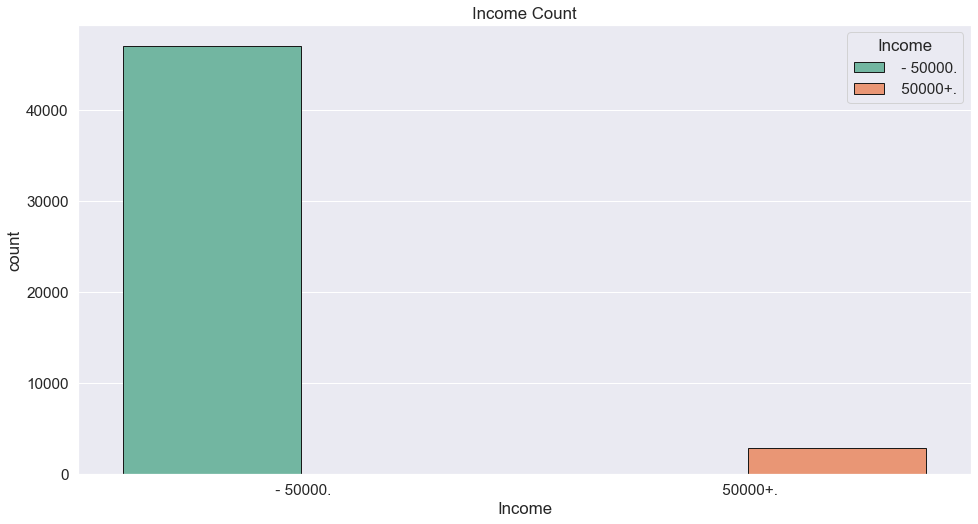

In [66]:
ax=sns.countplot(test_data['Income'],hue=train_data['Income'],edgecolor='k',palette='Set2')
ax.set_title('Income Count')
ax.set_xlabel('Income')
plt.show()

C:\Users\Harsh07\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


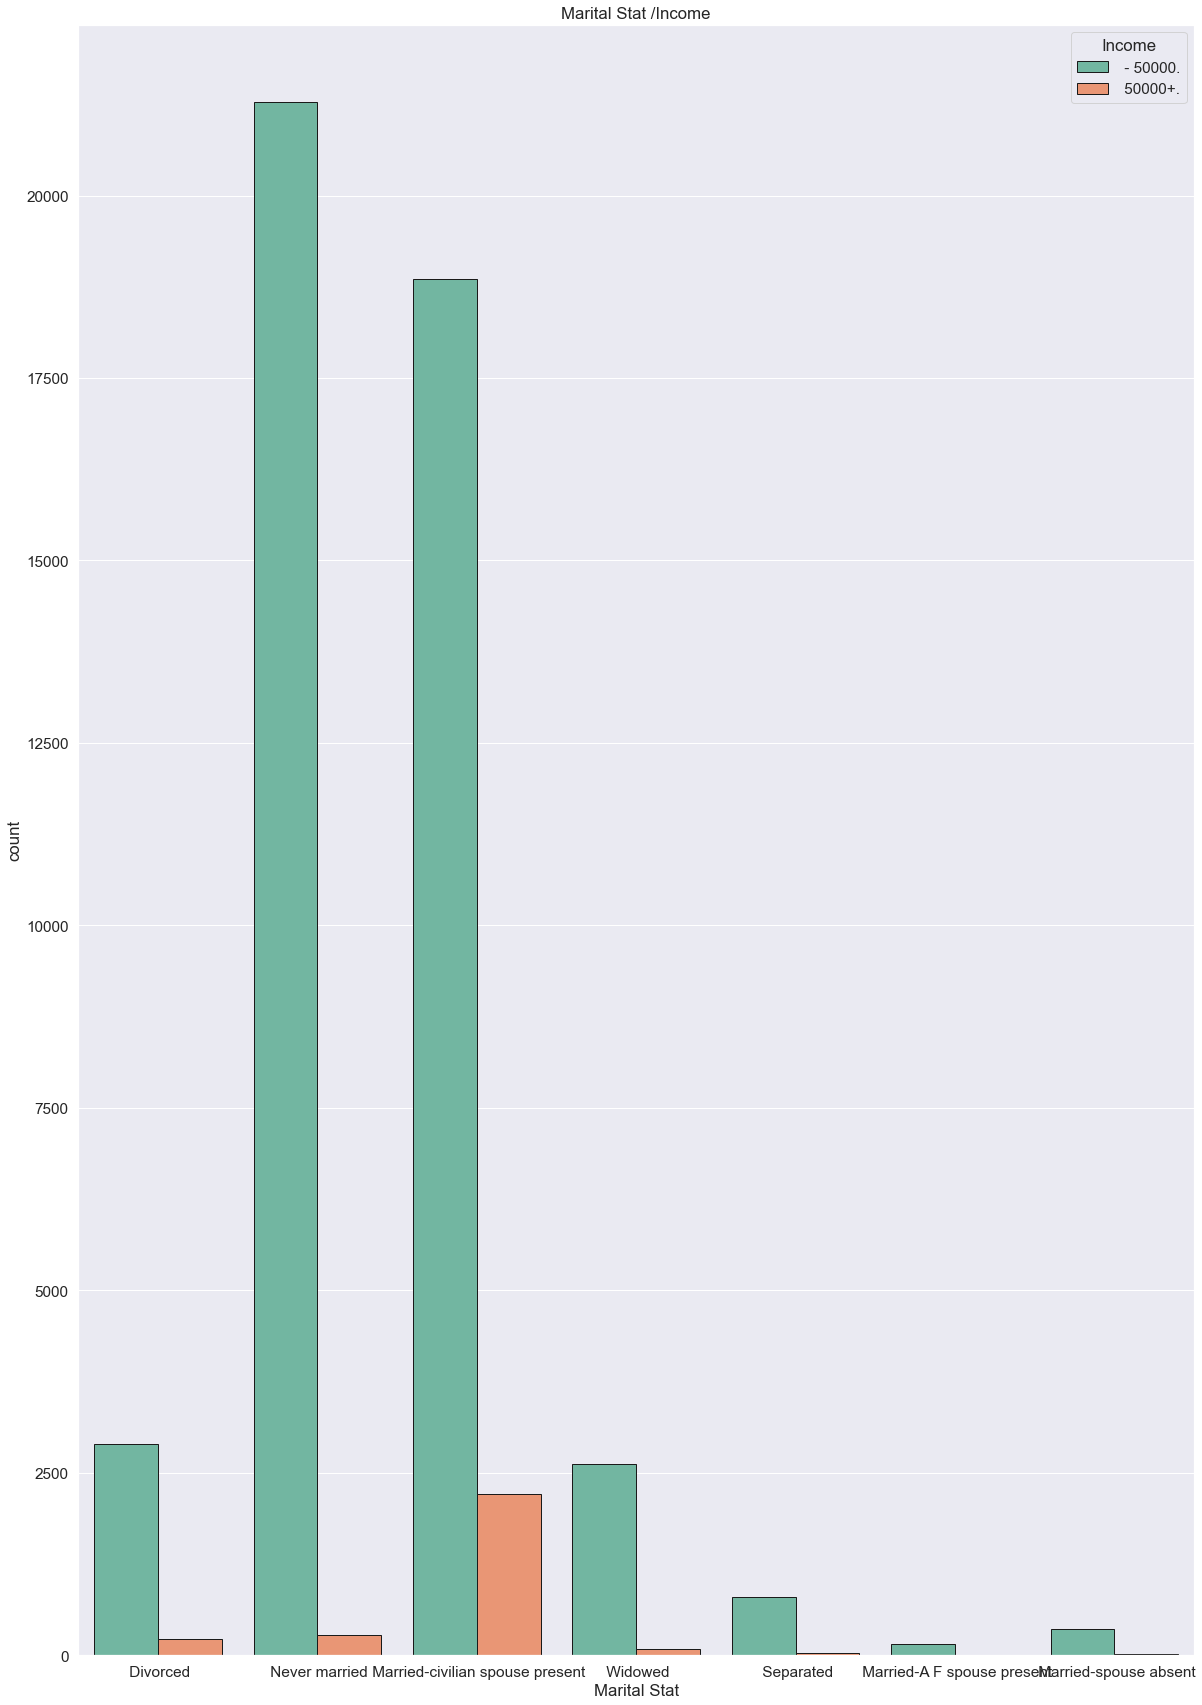

In [67]:
fig_dims = (20, 30)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.countplot(test_data['Marital Stat'], hue=test_data['Income'],edgecolor='k',palette='Set2')
ax.set_title('Marital Stat /Income')
ax.set_xlabel('Marital Stat')
plt.show()

C:\Users\Harsh07\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


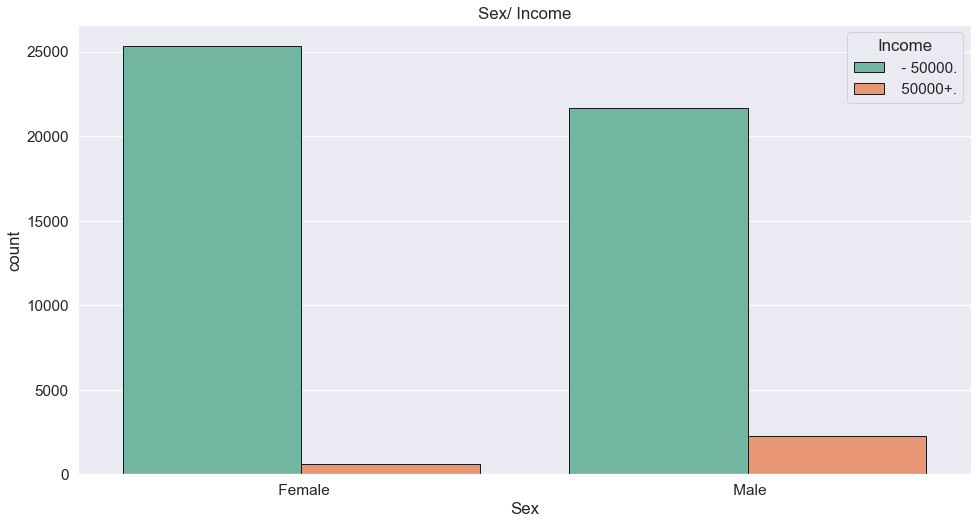

In [68]:
ax = sns.countplot(test_data['Sex'],hue = test_data['Income'],edgecolor='k',palette='Set2') 
ax.set_title('Sex/ Income')
ax.set_xlabel('Sex')
plt.show()

C:\Users\Harsh07\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


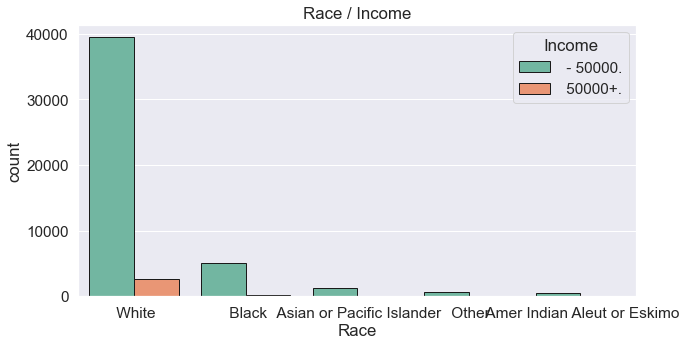

In [69]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.countplot(test_data['Race'], hue=test_data['Income'],edgecolor='k',palette='Set2')
ax.set_title('Race / Income')
ax.set_xlabel('Race')
plt.show()

C:\Users\Harsh07\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


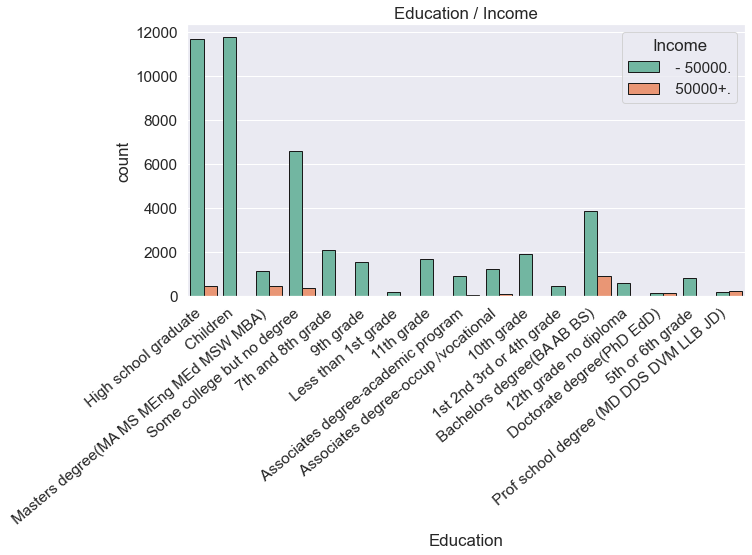

In [70]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.countplot(test_data['Education'], hue=test_data['Income'],edgecolor='k',palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Education / Income')
ax.set_xlabel('Education')
plt.show()

C:\Users\Harsh07\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


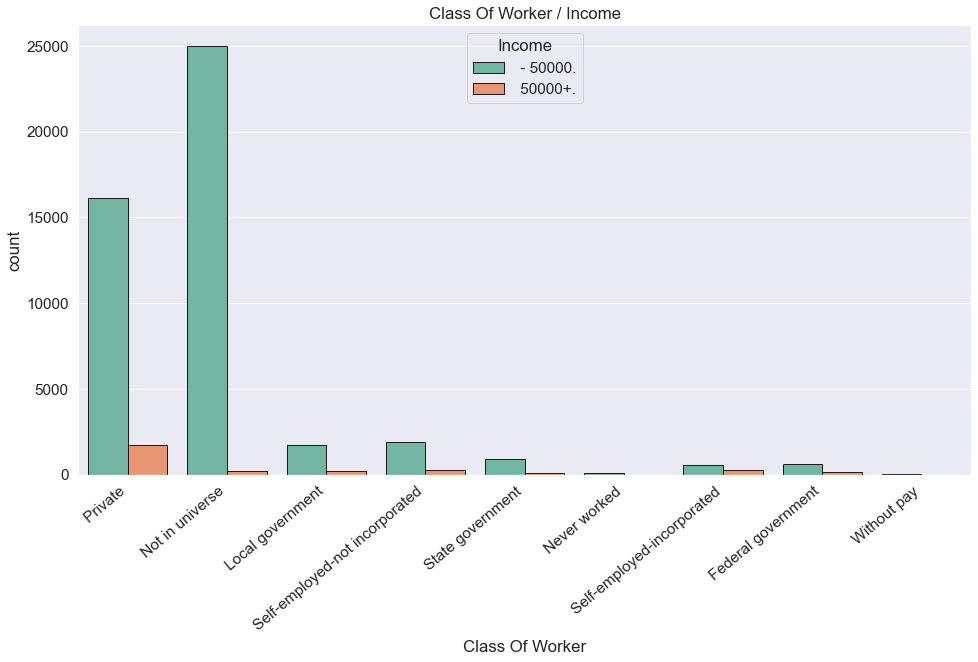

In [71]:
ax=sns.countplot(test_data['Class Of Worker'], hue=test_data['Income'],edgecolor='k',palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Class Of Worker / Income')
ax.set_xlabel('Class Of Worker')
plt.show()

C:\Users\Harsh07\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


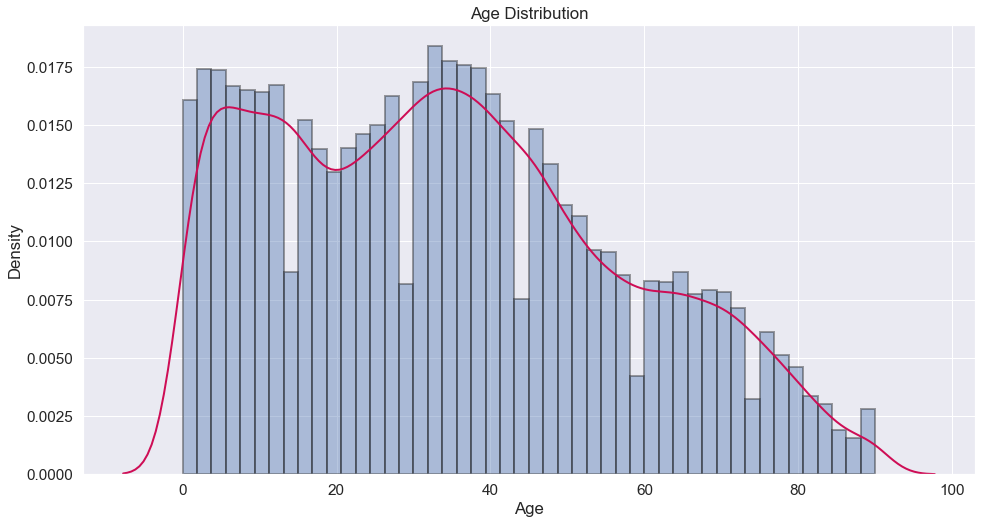

In [72]:
ax=sns.distplot(test_data['Age'],hist_kws=dict(edgecolor="k", linewidth=2),kde_kws={"color": "#ce0d55", "lw": 2})
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
plt.show()

C:\Users\Harsh07\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


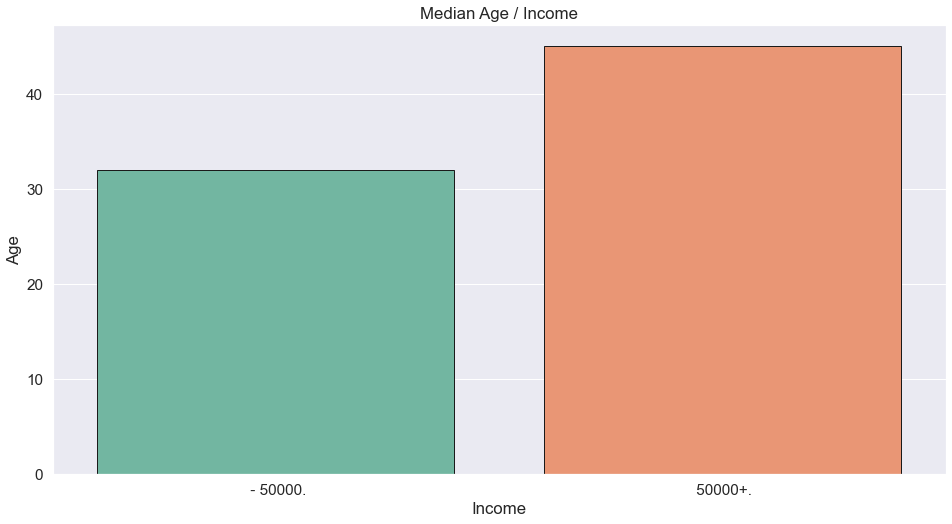

In [73]:
#median age for each wage_class
ax=sns.barplot(test_data.groupby('Income')['Age'].median().index,test_data.groupby('Income')['Age'].median().values,
               edgecolor='k', palette='Set2')
ax.set_ylabel('Age')
ax.set_xlabel('Income')
ax.set_title('Median Age / Income')
plt.show()

C:\Users\Harsh07\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


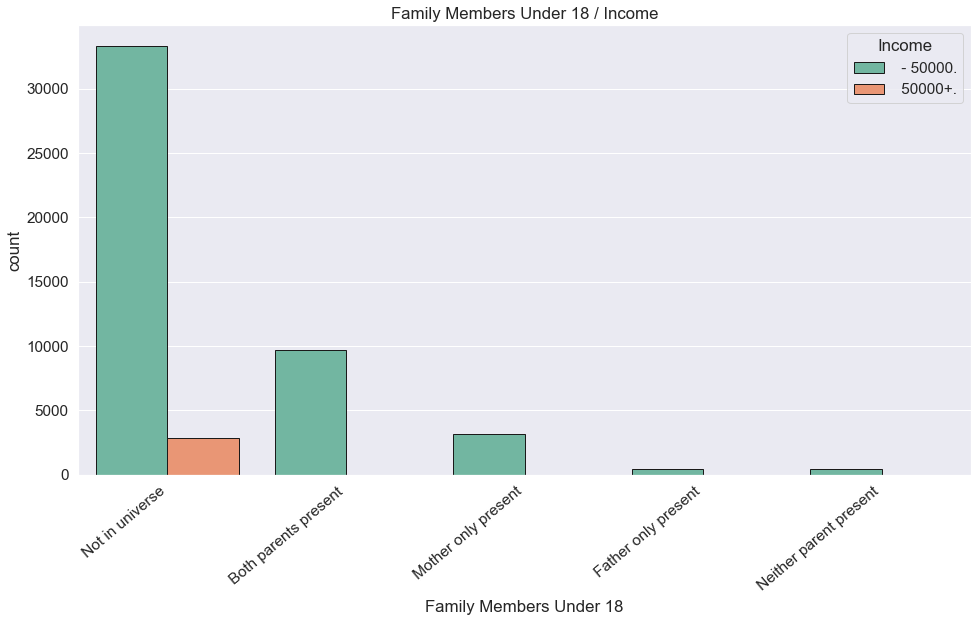

In [74]:
ax=sns.countplot(test_data['Family Members Under 18'], hue=test_data['Income'],edgecolor='k',palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Family Members Under 18 / Income')
ax.set_xlabel('Family Members Under 18')
plt.show()

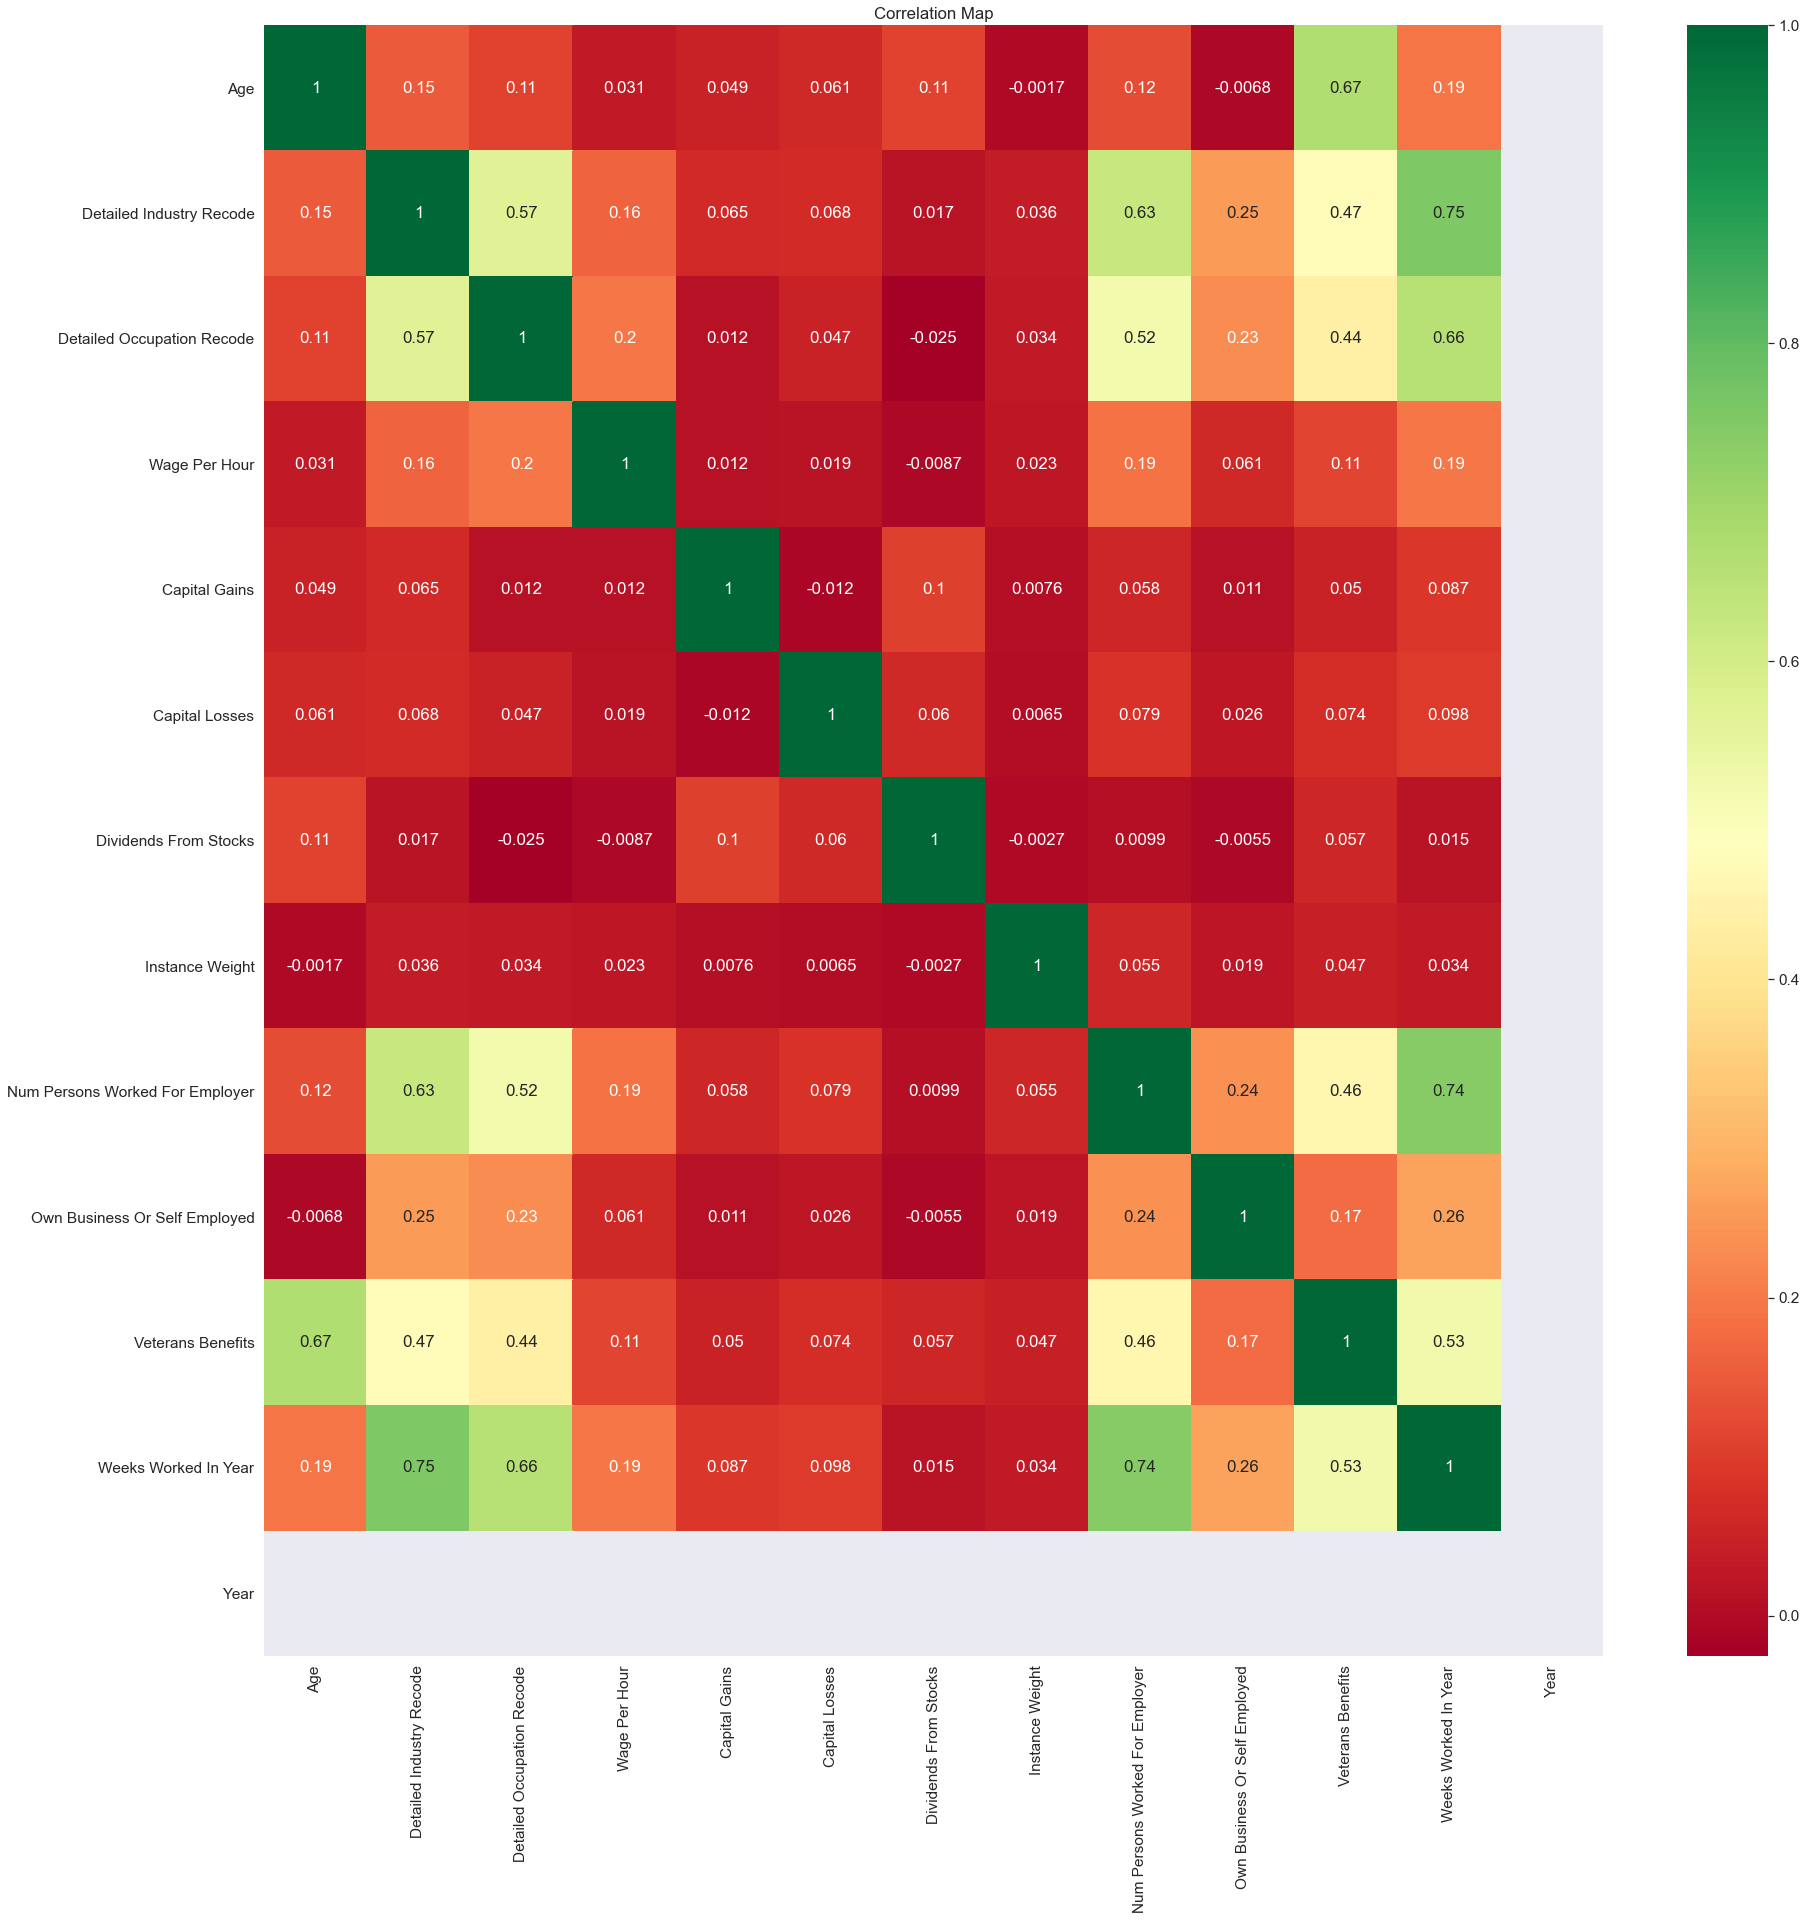

In [75]:
corr_test = test_data.copy()
for feature in categorical_features:
    corr_test.drop(feature, axis=1, inplace=True)
    
fig_dims = (30, 30)
fig, ax = plt.subplots(figsize=fig_dims)
ax=sns.heatmap(corr_test.corr(), cmap='RdYlGn',annot=True)
ax.set_title('Correlation Map')
plt.show()


## 2) Data Preparation

In [76]:
train_data['Income'] = train_data['Income'].map(lambda x: '<=50k' if (x == ' - 50000.') else '>50k')

In [77]:
pip install Scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [78]:
from sklearn import preprocessing

In [79]:
#convert <=50k and >50k to 0, 1 respectively
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [80]:
train_data['Income']=le.fit_transform(train_data['Income'])

In [81]:
train_data['Income']

3        0
5        0
6        0
8        0
9        0
        ..
99749    0
99750    0
99751    0
99759    0
99761    0
Name: Income, Length: 49816, dtype: int32

In [82]:
categorical_feature=[feature for feature in  train_data.columns if  train_data[feature].dtype=='O' and feature!='Income']
for feature in categorical_features:
    freq=train_data[feature].value_counts().rename_axis(feature).reset_index(name='frequency')
    print('\n')
    print(freq)



                   Class Of Worker  frequency
0                  Not in universe      25172
1                          Private      17843
2   Self-employed-not incorporated       2184
3                 Local government       1934
4                 State government       1028
5       Self-employed-incorporated        802
6               Federal government        720
7                     Never worked         95
8                      Without pay         38


                                  Education  frequency
0                      High school graduate      12144
1                                  Children      11755
2                Some college but no degree       6986
3                Bachelors degree(BA AB BS)       4790
4                         7th and 8th grade       2135
5                                10th grade       1914
6                                11th grade       1716
7    Masters degree(MA MS MEng MEd MSW MBA)       1625
8                                 9th gra

In [83]:
#transform country feature to be 1 if country of birth is the United States. Otherwise is equal to 0
train_data['Country Of Birth Self']=np.where(train_data['Country Of Birth Self']==' United-States',1,0)

In [84]:
#transform marital status and concatenate some classes to reduce distinct classes
train_data['Marital Stat']=train_data['Marital Stat'].replace({' Married-civilian spouse present': 'Married', ' Never married': 'Single',  
                                                        ' Separated':'Divorced', ' Married-spouse absent' : 'Divorced', 
                                                         ' Divorced':'Divorced', 
                                                         ' Married-A F spouse present' :'Divorced', ' Widowed':'Widowed' })

In [85]:
train_data['Marital Stat'].value_counts()

Single      21551
Married     21066
Divorced     4491
Widowed      2708
Name: Marital Stat, dtype: int64

In [86]:
#transform workclass feature to be 1 if the workclass is Private and 0 if doesn't
train_data['Class Of Worker']=np.where(train_data['Class Of Worker']==' Private',1,0)

In [87]:
train_data['Class Of Worker'].value_counts()

0    31973
1    17843
Name: Class Of Worker, dtype: int64

In [88]:
#transform workclass feature to be 1 if the Sex is Male and 0 if doesn't
train_data['Sex']=np.where(train_data['Sex']==' Male',1,0)

In [89]:
train_data['Sex'].value_counts()

0    25930
1    23886
Name: Sex, dtype: int64

In [90]:
#transform workclass feature to be 1 if the Race is White and 0 if doesn't
train_data['Race']=np.where(train_data['Race']==' White',1,0)

In [91]:
train_data['Race'].value_counts()

1    42066
0     7750
Name: Race, dtype: int64

In [92]:
categorical_feature

['Class Of Worker',
 'Education',
 'Enroll In Edu Inst Last Wk',
 'Marital Stat',
 'Major Industry Code',
 'Major Occupation Code',
 'Race',
 'Hispanic Origin',
 'Sex',
 'Member Of A Labor Union',
 'Reason For Unemployment',
 'Full Or Part Time Employment Stat',
 'Tax Filer Stat',
 'Region Of Previous Residence',
 'State Of Previous Residence',
 'Detailed Household And Family Stat',
 'Detailed Household Summary In Household',
 'Migration Code-Change In Msa',
 'Migration Code-Change In Reg',
 'Migration Code-Move Within Reg',
 'Live In This House 1 Year Ago',
 'Migration Prev Res In Sunbelt',
 'Family Members Under 18',
 'Country Of Birth Father',
 'Country Of Birth Mother',
 'Country Of Birth Self',
 'Citizenship',
 "Fill Inc Questionnaire For Veteran'S Admin"]

In [93]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49816 entries, 3 to 99761
Data columns (total 42 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Age                                         49816 non-null  int64  
 1   Class Of Worker                             49816 non-null  int32  
 2   Detailed Industry Recode                    49816 non-null  int64  
 3   Detailed Occupation Recode                  49816 non-null  int64  
 4   Education                                   49816 non-null  object 
 5   Wage Per Hour                               49816 non-null  int64  
 6   Enroll In Edu Inst Last Wk                  49816 non-null  object 
 7   Marital Stat                                49816 non-null  object 
 8   Major Industry Code                         49816 non-null  object 
 9   Major Occupation Code                       49816 non-null  object 
 10  Race      

In [94]:
updated_categorical_features = [feature for feature in train_data.columns if train_data[feature].dtypes == 'O' and feature != 'Income']


In [95]:
for col in updated_categorical_features:
    train_data[col] = le.fit_transform(train_data[col])

In [96]:
train_data.shape

(49816, 42)

In [97]:
#scaling the train set with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_features_train=scaler.fit_transform(train_data.drop('Income',axis=1))
scaled_features_train=pd.DataFrame(scaled_features_train, columns=train_data.drop('Income',axis=1).columns)

In [98]:
train_data.head()

,Age,Class Of Worker,Detailed Industry Recode,Detailed Occupation Recode,Education,Wage Per Hour,Enroll In Edu Inst Last Wk,Marital Stat,Major Industry Code,Major Occupation Code,Race,Hispanic Origin,Sex,Member Of A Labor Union,Reason For Unemployment,Full Or Part Time Employment Stat,Capital Gains,Capital Losses,Dividends From Stocks,Tax Filer Stat,Region Of Previous Residence,State Of Previous Residence,Detailed Household And Family Stat,Detailed Household Summary In Household,Instance Weight,Migration Code-Change In Msa,Migration Code-Change In Reg,Migration Code-Move Within Reg,Live In This House 1 Year Ago,Migration Prev Res In Sunbelt,Num Persons Worked For Employer,Family Members Under 18,Country Of Birth Father,Country Of Birth Mother,Country Of Birth Self,Citizenship,Own Business Or Self Employed,Fill Inc Questionnaire For Veteran'S Admin,Veterans Benefits,Weeks Worked In Year,Year,Income
3,35,1,29,3,12,0,2,0,21,2,1,0,0,1,3,0,0,0,0,0,3,35,19,4,1866.88,6,5,6,2,1,5,4,37,37,1,4,2,1,2,52,94,0
5,13,0,0,0,10,0,2,2,14,6,1,0,1,1,3,0,0,0,0,4,3,35,8,2,2556.34,6,5,6,2,1,0,0,10,37,1,4,0,1,0,0,94,0
6,1,0,0,0,10,0,2,2,14,6,1,6,0,1,3,0,0,0,0,4,3,35,8,2,1723.61,6,5,6,2,1,0,0,24,37,1,4,0,1,0,0,94,0
8,38,1,45,12,14,0,2,1,15,10,0,0,1,1,3,0,0,0,0,2,3,35,19,4,1767.95,6,5,6,2,1,1,4,37,37,1,4,0,1,2,52,94,0
9,7,0,0,0,10,0,2,2,14,6,1,0,0,1,3,0,0,0,0,4,3,35,8,2,1595.19,6,5,6,2,1,0,0,37,37,1,4,0,1,0,0,94,0


In [99]:
#undersampling the train set
under=OneSidedSelection()
X_train_res, y_train_res=under.fit_resample(scaled_features_train, train_data['Income'])


#oversampling the train set
sm=SMOTE()
X_train_res, y_train_res= sm.fit_resample(X_train_res, y_train_res)

X_train_res=pd.DataFrame(X_train_res, columns=train_data.drop('Income',axis=1).columns)



#creating the final train 
final_train=pd.concat([X_train_res, y_train_res],axis=1)

In [100]:
final_train.head()

,Age,Class Of Worker,Detailed Industry Recode,Detailed Occupation Recode,Education,Wage Per Hour,Enroll In Edu Inst Last Wk,Marital Stat,Major Industry Code,Major Occupation Code,Race,Hispanic Origin,Sex,Member Of A Labor Union,Reason For Unemployment,Full Or Part Time Employment Stat,Capital Gains,Capital Losses,Dividends From Stocks,Tax Filer Stat,Region Of Previous Residence,State Of Previous Residence,Detailed Household And Family Stat,Detailed Household Summary In Household,Instance Weight,Migration Code-Change In Msa,Migration Code-Change In Reg,Migration Code-Move Within Reg,Live In This House 1 Year Ago,Migration Prev Res In Sunbelt,Num Persons Worked For Employer,Family Members Under 18,Country Of Birth Father,Country Of Birth Mother,Country Of Birth Self,Citizenship,Own Business Or Self Employed,Fill Inc Questionnaire For Veteran'S Admin,Veterans Benefits,Weeks Worked In Year,Year,Income
0,-0.921096,-0.747037,-0.846867,-0.782090,-0.002852,-0.199799,0.245556,0.749183,0.206783,-0.095576,0.429225,-0.362545,1.041908,0.213157,-0.044229,0.0,-0.091005,-0.135441,-0.106229,0.562984,-0.037218,0.251963,-1.041677,-0.945784,4.402476,0.355903,-0.036222,0.004818,0.4452,0.098961,-0.818380,-1.908397,0.379287,0.374747,0.322725,0.341331,-0.313401,0.063078,-1.787186,-0.943189,0.0,0
1,0.016195,1.338621,0.762813,-0.574680,0.478828,-0.199799,0.245556,-1.980979,1.668969,-1.388681,0.429225,-0.362545,-0.959777,0.213157,-0.044229,0.0,-0.091005,-0.135441,-0.106229,-2.324891,-0.037218,0.251963,-0.012456,0.019226,0.142174,0.355903,-0.036222,0.004818,0.4452,0.098961,1.328999,0.585961,0.379287,0.374747,0.322725,0.341331,3.319502,0.063078,0.567463,1.191312,0.0,0
2,-1.501324,-0.747037,-0.846867,-0.782090,-0.002852,-0.199799,0.245556,0.749183,0.206783,-0.095576,0.429225,2.572297,-0.959777,0.213157,-0.044229,0.0,-0.091005,-0.135441,-0.106229,0.562984,-0.037218,0.251963,-1.041677,-0.945784,-0.005107,0.355903,-0.036222,0.004818,0.4452,0.098961,-0.818380,-1.908397,-1.278076,0.374747,0.322725,0.341331,-0.313401,0.063078,-1.787186,-0.943189,0.0,0
3,0.150094,1.338621,1.650912,0.047552,0.960509,-0.199799,0.245556,-0.615898,0.415667,1.197529,-2.329779,-0.362545,1.041908,0.213157,-0.044229,0.0,-0.091005,-0.135441,-0.106229,-0.880954,-0.037218,0.251963,-0.012456,0.019226,0.040474,0.355903,-0.036222,0.004818,0.4452,0.098961,-0.388904,0.585961,0.379287,0.374747,0.322725,0.341331,-0.313401,0.063078,0.567463,1.191312,0.0,0
4,-1.233527,-0.747037,-0.846867,-0.782090,-0.002852,-0.199799,0.245556,0.749183,0.206783,-0.095576,0.429225,-0.362545,-0.959777,0.213157,-0.044229,0.0,-0.091005,-0.135441,-0.106229,0.562984,-0.037218,0.251963,-1.041677,-0.945784,-0.137123,0.355903,-0.036222,0.004818,0.4452,0.098961,-0.818380,-1.908397,0.379287,0.374747,0.322725,0.341331,-0.313401,0.063078,-1.787186,-0.943189,0.0,0


In [101]:
final_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86572 entries, 0 to 86571
Data columns (total 42 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Age                                         86572 non-null  float64
 1   Class Of Worker                             86572 non-null  float64
 2   Detailed Industry Recode                    86572 non-null  float64
 3   Detailed Occupation Recode                  86572 non-null  float64
 4   Education                                   86572 non-null  float64
 5   Wage Per Hour                               86572 non-null  float64
 6   Enroll In Edu Inst Last Wk                  86572 non-null  float64
 7   Marital Stat                                86572 non-null  float64
 8   Major Industry Code                         86572 non-null  float64
 9   Major Occupation Code                       86572 non-null  float64
 10  Race      

NameError: name 'final_test' is not defined

In [ ]:
#final_test.dropna(inplace=True)

In [103]:
final_train['Income'].value_counts() #now train set is balanced

1    43286
0    43286
Name: Income, dtype: int64

##### Test Set
Now for the test set we have to apply all the transformations that we did before for the train set

In [104]:
test_data['Income'] = test_data['Income'].map(lambda x: '<=50k' if (x == ' - 50000.') else '>50k')

In [105]:
test_data['Income']=le.fit_transform(test_data['Income'])

In [106]:
test_data['Income']

3        0
5        0
6        0
8        0
9        0
        ..
99749    0
99750    0
99751    0
99759    0
99761    0
Name: Income, Length: 49816, dtype: int32

In [107]:
#transform country feature to be 1 if country of birth is the United States. Otherwise is equal to 0
test_data['Country Of Birth Self']=np.where(test_data['Country Of Birth Self']==' United-States',1,0)

In [108]:
#transform marital status and concatenate some classes to reduce distinct classes
test_data['Marital Stat']=test_data['Marital Stat'].replace({' Married-civilian spouse present': 'Married', ' Never married': 'Single',  
                                                        ' Separated':'Divorced', ' Married-spouse absent' : 'Divorced', 
                                                         ' Divorced':'Divorced', 
                                                         ' Married-A F spouse present' :'Divorced', ' Widowed':'Widowed' })

In [109]:
test_data['Marital Stat'].value_counts()

Single      21551
Married     21066
Divorced     4491
Widowed      2708
Name: Marital Stat, dtype: int64

In [110]:
#transform workclass feature to be 1 if the workclass is Private and 0 if doesn't
test_data['Class Of Worker']=np.where(test_data['Class Of Worker']==' Private',1,0)

In [111]:
test_data['Class Of Worker'].value_counts()

0    31973
1    17843
Name: Class Of Worker, dtype: int64

In [112]:
#transform workclass feature to be 1 if the Sex is Male and 0 if doesn't
test_data['Sex']=np.where(test_data['Sex']==' Male',1,0)

In [113]:
test_data['Sex'].value_counts()

0    25930
1    23886
Name: Sex, dtype: int64

In [114]:
#transform workclass feature to be 1 if the Race is White and 0 if doesn't
test_data['Race']=np.where(test_data['Race']==' White',1,0)

In [115]:
test_data['Race'].value_counts()

1    42066
0     7750
Name: Race, dtype: int64

In [116]:
updated_categorical_features_test = [feature for feature in test_data.columns if test_data[feature].dtypes == 'O' and feature != 'Income']


In [117]:
len(updated_categorical_features_test)

24

In [118]:
for col in updated_categorical_features_test:
    test_data[col] = le.fit_transform(test_data[col])

In [119]:
test_data.shape

(49816, 42)

In [120]:
#scaling the train set with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_features_test=scaler.fit_transform(test_data.drop('Income',axis=1))
scaled_features_test=pd.DataFrame(scaled_features_train, columns=test_data.drop('Income',axis=1).columns)

final_test=pd.concat([scaled_features_test,test_data['Income']],axis=1)


In [124]:
final_test.dropna(inplace=True)

In [127]:
final_test.shape

(24921, 42)

In [128]:
final_test.head(10)

,Age,Class Of Worker,Detailed Industry Recode,Detailed Occupation Recode,Education,Wage Per Hour,Enroll In Edu Inst Last Wk,Marital Stat,Major Industry Code,Major Occupation Code,Race,Hispanic Origin,Sex,Member Of A Labor Union,Reason For Unemployment,Full Or Part Time Employment Stat,Capital Gains,Capital Losses,Dividends From Stocks,Tax Filer Stat,Region Of Previous Residence,State Of Previous Residence,Detailed Household And Family Stat,Detailed Household Summary In Household,Instance Weight,Migration Code-Change In Msa,Migration Code-Change In Reg,Migration Code-Move Within Reg,Live In This House 1 Year Ago,Migration Prev Res In Sunbelt,Num Persons Worked For Employer,Family Members Under 18,Country Of Birth Father,Country Of Birth Mother,Country Of Birth Self,Citizenship,Own Business Or Self Employed,Fill Inc Questionnaire For Veteran'S Admin,Veterans Benefits,Weeks Worked In Year,Year,Income
3,0.150094,1.338621,1.650912,0.047552,0.960509,-0.199799,0.245556,-0.615898,0.415667,1.197529,-2.329779,-0.362545,1.041908,0.213157,-0.044229,0.0,-0.091005,-0.135441,-0.106229,-0.880954,-0.037218,0.251963,-0.012456,0.019226,0.040474,0.355903,-0.036222,0.004818,0.445200,0.098961,-0.388904,0.585961,0.379287,0.374747,0.322725,0.341331,-0.313401,0.063078,0.567463,1.191312,0.0,0.0
5,-0.073071,1.338621,1.151356,1.084604,0.478828,-0.199799,0.245556,-0.615898,0.833434,0.874253,-2.329779,-0.362545,-0.959777,0.213157,-0.044229,0.0,-0.091005,-0.135441,-0.106229,-0.880954,-1.595260,-0.024152,1.484591,1.466742,-0.395634,-2.634933,1.933666,1.707005,-2.307959,-2.458003,0.470047,0.585961,0.251798,0.246125,-3.098613,-3.279760,-0.313401,0.063078,0.567463,0.288254,0.0,0.0
6,-0.385501,1.338621,0.984837,1.222878,1.442189,1.376500,0.245556,0.749183,1.251202,0.227700,0.429225,-0.362545,1.041908,-3.145040,-0.044229,0.0,-0.091005,-0.135441,-0.106229,1.284953,-0.037218,0.251963,1.297460,0.501731,0.412878,0.355903,-0.036222,0.004818,0.445200,0.098961,1.758475,0.585961,0.379287,0.374747,0.322725,0.341331,-0.313401,0.063078,0.567463,-0.245371,0.0,0.0
8,-1.188894,-0.747037,-0.846867,-0.782090,-0.002852,-0.199799,0.245556,0.749183,0.206783,-0.095576,0.429225,-0.362545,1.041908,0.213157,-0.044229,0.0,-0.091005,-0.135441,-0.106229,0.562984,-3.153302,-2.233074,-1.041677,-0.945784,-0.437885,-2.634933,1.933666,1.707005,-2.307959,-2.458003,-0.818380,-1.908397,0.379287,0.374747,0.322725,0.341331,-0.313401,0.063078,-1.787186,-0.943189,0.0,0.0
9,-0.251602,-0.747037,-0.846867,-0.782090,0.478828,-0.199799,0.245556,-0.615898,0.206783,-0.095576,0.429225,-0.362545,-0.959777,0.213157,-0.044229,0.0,-0.091005,-0.135441,-0.106229,-0.880954,-3.153302,-0.714440,1.484591,1.466742,-0.304040,-0.391806,1.933666,1.707005,-2.307959,-2.458003,-0.818380,0.585961,0.379287,0.374747,0.322725,0.341331,-0.313401,0.063078,0.567463,-0.943189,0.0,0.0
12,-0.340868,1.338621,1.373381,0.808057,1.442189,-0.199799,0.245556,0.749183,-1.464287,-2.035234,0.429225,-0.362545,-0.959777,0.213157,-0.044229,0.0,-0.091005,-0.135441,-0.106229,1.284953,-0.037218,0.251963,-0.480284,0.984237,1.696388,0.355903,-0.036222,0.004818,0.445200,0.098961,0.470047,0.585961,0.379287,0.374747,0.322725,0.341331,-0.313401,0.063078,0.567463,1.191312,0.0,0.0
13,0.283993,-0.747037,1.761924,1.153741,0.478828,-0.199799,0.245556,-0.615898,1.042318,1.520805,0.429225,-0.362545,1.041908,0.213157,-0.044229,0.0,-0.091005,-0.135441,-0.106229,-0.880954,-0.037218,0.251963,-0.012456,0.019226,1.218450,0.355903,-0.036222,0.004818,0.445200,0.098961,0.040572,0.585961,0.379287,0.374747,0.322725,0.341331,-0.313401,0.063078,0.567463,1.191312,0.0,0.0
18,2.069310,-0.747037,-0.846867,-0.782090,-0.966213,-0.199799,0.245556,-0.615898,0.206783,-0.095576,0.429225,-0.362545,-0.959777,0.213157,-0.044229,0.0,-0.091005,-0.135441,-0.106229,0.562984,3.078865,-4.165881,1.484591,1.466742,0.616874,-0.391806,1.933666,1.707005,-2.307959,2.655924,-0.818380,0.585961,0.379287,0.374747,0.322725,0.341331,-0.313401,0.063078,0.567463,-0.943189,0.0,0.0
20,-0.296235,1.338621,1.317

In [ ]:
54545488888*****

## Feature Selection

In [129]:
X_train=final_train.drop('Income',axis=1)
y_train=final_train['Income']

In [130]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
86567    1
86568    1
86569    1
86570    1
86571    1
Name: Income, Length: 86572, dtype: int32

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [131]:
model=xgb.XGBClassifier()

In [132]:
model.fit(X_train, y_train)

C:\Users\Harsh07\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

C:\Users\Harsh07\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


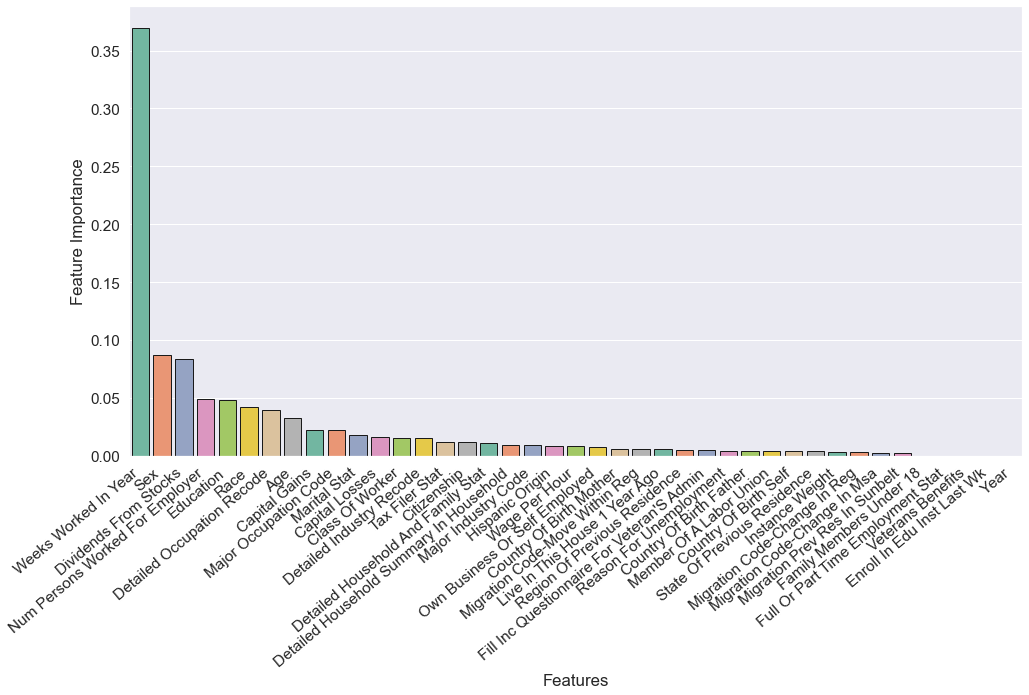

Weeks Worked In Year                          0.369805
Sex                                           0.087499
Dividends From Stocks                         0.083976
Num Persons Worked For Employer               0.048975
Education                                     0.048317
Race                                          0.041768
Detailed Occupation Recode                    0.039273
Age                                           0.032544
Capital Gains                                 0.022305
Major Occupation Code                         0.022192
Marital Stat                                  0.018175
Capital Losses                                0.016505
Class Of Worker                               0.015244
Detailed Industry Recode                      0.014974
Tax Filer Stat                                0.012086
Citizenship                                   0.011769
Detailed Household And Family Stat            0.011277
Detailed Household Summary In Household       0.009723
Major Indu

In [133]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances=feat_importances.nlargest(X_train.shape[1])
ax=sns.barplot(feat_importances.index, feat_importances.values ,edgecolor='k', palette='Set2')
ax.set_ylabel('Feature Importance')
ax.set_xlabel('Features')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()
print(feat_importances)

In [134]:
final_train.drop(["Tax Filer Stat","Capital Losses","Citizenship","Marital Stat","Class Of Worker","Detailed Industry Recode","Major Industry Code","Detailed Household And Family Stat","Hispanic Origin","Wage Per Hour","Country Of Birth Mother","Detailed Household Summary In Household","Own Business Or Self Employed","Region Of Previous Residence","Migration Code-Move Within Reg","Migration Code-Change In Reg","Country Of Birth Father",
"Fill Inc Questionnaire For Veteran'S Admin","State Of Previous Residence","Migration Prev Res In Sunbelt","Reason For Unemployment","Instance Weight","Veterans Benefits","Member Of A Labor Union","Country Of Birth Self","Migration Code-Change In Msa","Live In This House 1 Year Ago","Full Or Part Time Employment Stat","Family Members Under 18","Enroll In Edu Inst Last Wk","Year"],axis=1,inplace=True)
final_test.drop(["Tax Filer Stat","Capital Losses","Citizenship","Marital Stat","Class Of Worker","Detailed Industry Recode","Major Industry Code","Detailed Household And Family Stat","Hispanic Origin","Wage Per Hour","Country Of Birth Mother","Detailed Household Summary In Household","Own Business Or Self Employed","Region Of Previous Residence","Migration Code-Move Within Reg","Migration Code-Change In Reg","Country Of Birth Father",
"Fill Inc Questionnaire For Veteran'S Admin","State Of Previous Residence","Migration Prev Res In Sunbelt","Reason For Unemployment","Instance Weight","Veterans Benefits","Member Of A Labor Union","Country Of Birth Self","Migration Code-Change In Msa","Live In This House 1 Year Ago","Full Or Part Time Employment Stat","Family Members Under 18","Enroll In Edu Inst Last Wk","Year"],axis=1,inplace=True)


In [135]:
final_train.shape

(86572, 11)

In [136]:
final_test.shape

(24921, 11)

In [137]:
X_test=final_test.drop('Income',axis=1)
y_test=final_test['Income']

In [138]:
y_test


3        0.0
5        0.0
6        0.0
8        0.0
9        0.0
        ... 
49805    0.0
49807    0.0
49809    0.0
49811    0.0
49812    0.0
Name: Income, Length: 24921, dtype: float64

### Model Selection

###### XGBoost

In [139]:
xgb_classifier=xgb.XGBClassifier()
score_xgb=cross_val_score(xgb_classifier, X_train, y_train, cv=5, n_jobs=-1)

###### Random Forest

In [140]:
rf=RandomForestClassifier()
score_rf=cross_val_score(rf,X_train, y_train, cv=5, n_jobs=-1)

###### SVC

In [141]:
svc=SVC()
score_svc=cross_val_score(svc, X_train, y_train, cv=5, n_jobs=-1)

###### Logistic Regression

In [142]:
logReg=LogisticRegression()
score_logReg=cross_val_score(logReg, X_train, y_train, cv=5, n_jobs=-1)

###### KNN

In [143]:
knn=KNeighborsClassifier()
score_knn=cross_val_score(knn, X_train, y_train, cv=5, n_jobs=-1)

###### AdaBoost

In [144]:
adaboost=AdaBoostClassifier()
score_adaboost=cross_val_score(adaboost, X_train, y_train, cv=5, n_jobs=-1)

In [145]:
scores=pd.DataFrame({'Model':['XGBoost','Random Forest','SVC','Logistic Regression','KNN','Adaboost'],
                    'Accuracy':[score_xgb.mean(),score_rf.mean(),score_svc.mean(),score_logReg.mean(),score_knn.mean(),
                             score_adaboost.mean()]})

In [146]:
print(scores)


                 Model  Accuracy
0              XGBoost  0.963892
1        Random Forest  0.973595
2                  SVC  0.918507
3  Logistic Regression  0.871529
4                  KNN  0.931571
5             Adaboost  0.928407


#### Final Model Evaluation

At this point we are going to evaluate the model in the initial test set

In [147]:
X_train=final_train.drop('Income',axis=1)
y_train=final_train['Income']

X_test=final_test.drop('Income',axis=1)
y_test=final_test['Income']

In [152]:
xgb_classifier.fit(X_train,y_train)
y_pred=xgb_classifier.predict(X_test)

C:\Users\Harsh07\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:39:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [148]:
y_test=final_test['Income']

In [153]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95     23472
         1.0       0.05      0.04      0.05      1449

    accuracy                           0.90     24921
   macro avg       0.50      0.50      0.50     24921
weighted avg       0.89      0.90      0.89     24921



### Summary:

Characteristics that are associated with a person making more or less than $50,000 per year:

Weeks Worked In Year                          
Sex                                          
Dividends From Stocks                         
Num Persons Worked For Employer               
Education                                   
Race                                          
Detailed Occupation Recode                   
Age                                           
Capital Gains

Determined by feature selection using filter method. Other techniques also can be explored like  Recursive Feature Elimination and Lasso to select important features.

Developed Models-

                 Model  Accuracy
0              XGBoost  0.963892
1        Random Forest  0.973595
2                  SVC  0.918507
3  Logistic Regression  0.871529
4                  KNN  0.931571
5             Adaboost  0.928407

As far as the accuracy is concerned yje Random forest model can be picked.
Further work- accuracy metrics can be added and hyperparameter tuning could be explored to make the model better.